In [18]:
%pip install pandas numpy matplotlib seaborn scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.5/32.5 MB 25.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [35]:
COLUMN_DESCRIPTIONS = {
    'PLOT_NAME': 'Plot Name - Unique identifier for each plot',
    'Basalarea': 'Total basal area per plot.',
    'CBH': 'Canopy Base Height (m) - Height from ground to live crown',
    'LAI': 'Leaf Area Index - Total leaf area per unit ground area',
    'TBA': 'Total Basal Area (m²/ha) - Cross-sectional area of all trees',
    'MeanSH': 'Mean Shrub Height (m) - Average height of shrubs',
    'MeanTH': 'Mean Tree Height (m) - Average height of trees',
    'MeanSA': 'Mean Shrub Area (m²) - Average area of shrubs',
    'MeanSD': 'Mean Stem Density (stems/ha) - Average density of trees',
    'MDBH': 'Mean Diameter at Breast Height (cm) - Average tree diameter at 1.37m',
    'MLAI': 'Mean Leaf Area Index - Average LAI per tree',
    'OLAI': 'Overstory Leaf Area Index - LAI of upper canopy',
    'ULAI': 'Understory Leaf Area Index - LAI of lower canopy',
    'SDHT': 'Standard Deviation of Height (m) - Variation in tree heights',
    'SDSHT': 'Standard Deviation of Shrub Height (m) - Variation in shrub heights',
    'SDSD': 'Standard Deviation of Stem Density - Variation in tree density',
    'ULAI': 'Understory Leaf Area Index - LAI of lower canopy',
    'GCvol': 'Ground Cover Volume (m³) - Volume of ground vegetation',
    'MSvol': 'Mid-Story Volume (m³) - Volume of mid-canopy vegetation',
    'OSvol': 'Overstory Volume (m³) - Volume of overstory vegetation',
    'USvol': 'Understory Volume (m³) - Volume of understory vegetation',
    'MaxSD': 'Maximum Stem Density (stems/ha) - Highest tree density',
    'MaxSH': 'Maximum Shrub Height (m) - Tallest shrub measurement',
    'MaxTH': 'Maximum Tree Height (m) - Tallest tree measurement',
    'MinSD': 'Minimum Stem Density (stems/ha) - Lowest tree density',
    'TreesN': 'Number of Trees - Count of trees in plot',
    'ShrubsN': 'Number of Shrubs - Count of shrubs in plot',
    'LF_EVEL': 'Elevation (m) - Plot elevation above sea level',
    'LF_SLPD': 'Slope Degree - Terrain steepness in degrees',
    'LF_ASP': 'Aspect (degrees) - Direction slope faces',
    'LF_CBD': 'Canopy Bulk Density - Density of canopy fuels',
    'LF_EVC': 'Existing Vegetation Cover - Current vegetation coverage',
    'LF_EVT': 'Existing Vegetation Type - Current vegetation classification',
    'LF_FDist': 'Fire Disturbance - type of disturbance (e.g., "No Disturbance").',
    'LF_FBFM13': 'Fire Behavior Fuel Model 13 - Standard fuel classification',
    'LF_FBFM40': 'Fire Behavior Fuel Model 40 - Detailed fuel classification',
    'shrubArea': 'Shrub Area (m²) - Total area covered by shrubs',
    'scaledShrubArea': 'Scaled Shrub Area - Normalized shrub coverage',
    'latitude': 'Latitude - Plot latitude',
    'longitude': 'Longitude - Plot longitude'
}

In [3]:
# Read the data
df = pd.read_csv('../../data/raw/CASBC_plot_metrics.csv')

# Basic information
print('Dataset Shape:', df.shape)
print('\nColumns:', df.columns.tolist())
df.info()

# Summary statistics
df.describe()

Dataset Shape: (62, 39)

Columns: ['PLOT_NAME', 'CBH', 'LAI', 'TBA', 'MDBH', 'MLAI', 'OLAI', 'SDHT', 'SDSD', 'ULAI', 'GCvol', 'MSvol', 'MaxSD', 'MaxSH', 'MaxTH', 'MinSD', 'OSvol', 'SDSHT', 'USvol', 'LF_ASP', 'LF_CBD', 'LF_EVC', 'LF_EVT', 'MeanSA', 'MeanSD', 'MeanSH', 'MeanTH', 'TreesN', 'latlon', 'LF_EVEL', 'LF_SLPD', 'ShrubsN', 'LF_FDist', 'Basalarea', 'LF_FBFM13', 'LF_FBFM40', 'shrubArea', 'Unnamed: 0', 'scaledShrubArea']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PLOT_NAME        62 non-null     object 
 1   CBH              62 non-null     float64
 2   LAI              62 non-null     float64
 3   TBA              62 non-null     float64
 4   MDBH             62 non-null     float64
 5   MLAI             62 non-null     float64
 6   OLAI             62 non-null     float64
 7   SDHT             62 non-null     float64
 8   SDSD

,CBH,LAI,TBA,MDBH,MLAI,OLAI,SDHT,SDSD,ULAI,GCvol,...,MeanSD,MeanSH,MeanTH,TreesN,LF_EVEL,LF_SLPD,ShrubsN,Basalarea,shrubArea,scaledShrubArea
count,62.000000,62.00000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,3.054839,0.98871,5.480645,11.950000,0.593548,0.032258,1.474194,5.948387,0.532258,0.103226,...,8.772581,2.901613,8.270968,5.177419,386.016129,11.532258,26.483871,38.467742,158.375806,1090.020968
std,0.738114,0.37900,3.791312,3.482638,0.299108,0.056610,0.753774,1.111599,0.186226,0.017813,...,2.188582,0.094941,2.330087,2.250859,14.710866,4.478428,8.469312,27.250807,54.320167,335.086150
min,1.800000,0.20000,0.000000,0.000000,0.100000,0.000000,0.000000,2.200000,0.100000,0.100000,...,2.900000,2.600000,0.000000,1.000000,365.000000,1.000000,8.000000,0.000000,29.400000,182.200000
25%,2.500000,0.70000,3.175000,9.775000,0.300000,0.000000,1.100000,5.325000,0.400000,0.100000,...,7.600000,2.900000,7.100000,4.000000,372.000000,8.000000,20.250000,22.175000,118.925000,851.525000
50%,3.000000,1.00000,4.600000,11.600000,0.600000,0.000000,1.500000,6.200000,0.500000,0.100000,...,9.400000,2.900000,8.000000,5.000000,384.500000,11.000000,28.000000,32.500000,165.900000,1156.500000
75%,3.575000,1.30000,6.950000,14.500000,0.900000,0.100000,1.875000,6.700000,0.600000,0.100000,...,10.300000,3.000000,10.200000,7.000000,397.250000,14.000000,31.000000,47.200000,198.975000,1339.025000
max,5.100000,1.70000,19.300000,19.900000,1.200000,0.200000,3.700000,8.000000,1.000000,0.200000,...,12.200000,3.000000,12.400000,11.000000,414.000000,21.000000,44.000000,148.900000,267.200000,1746.800000


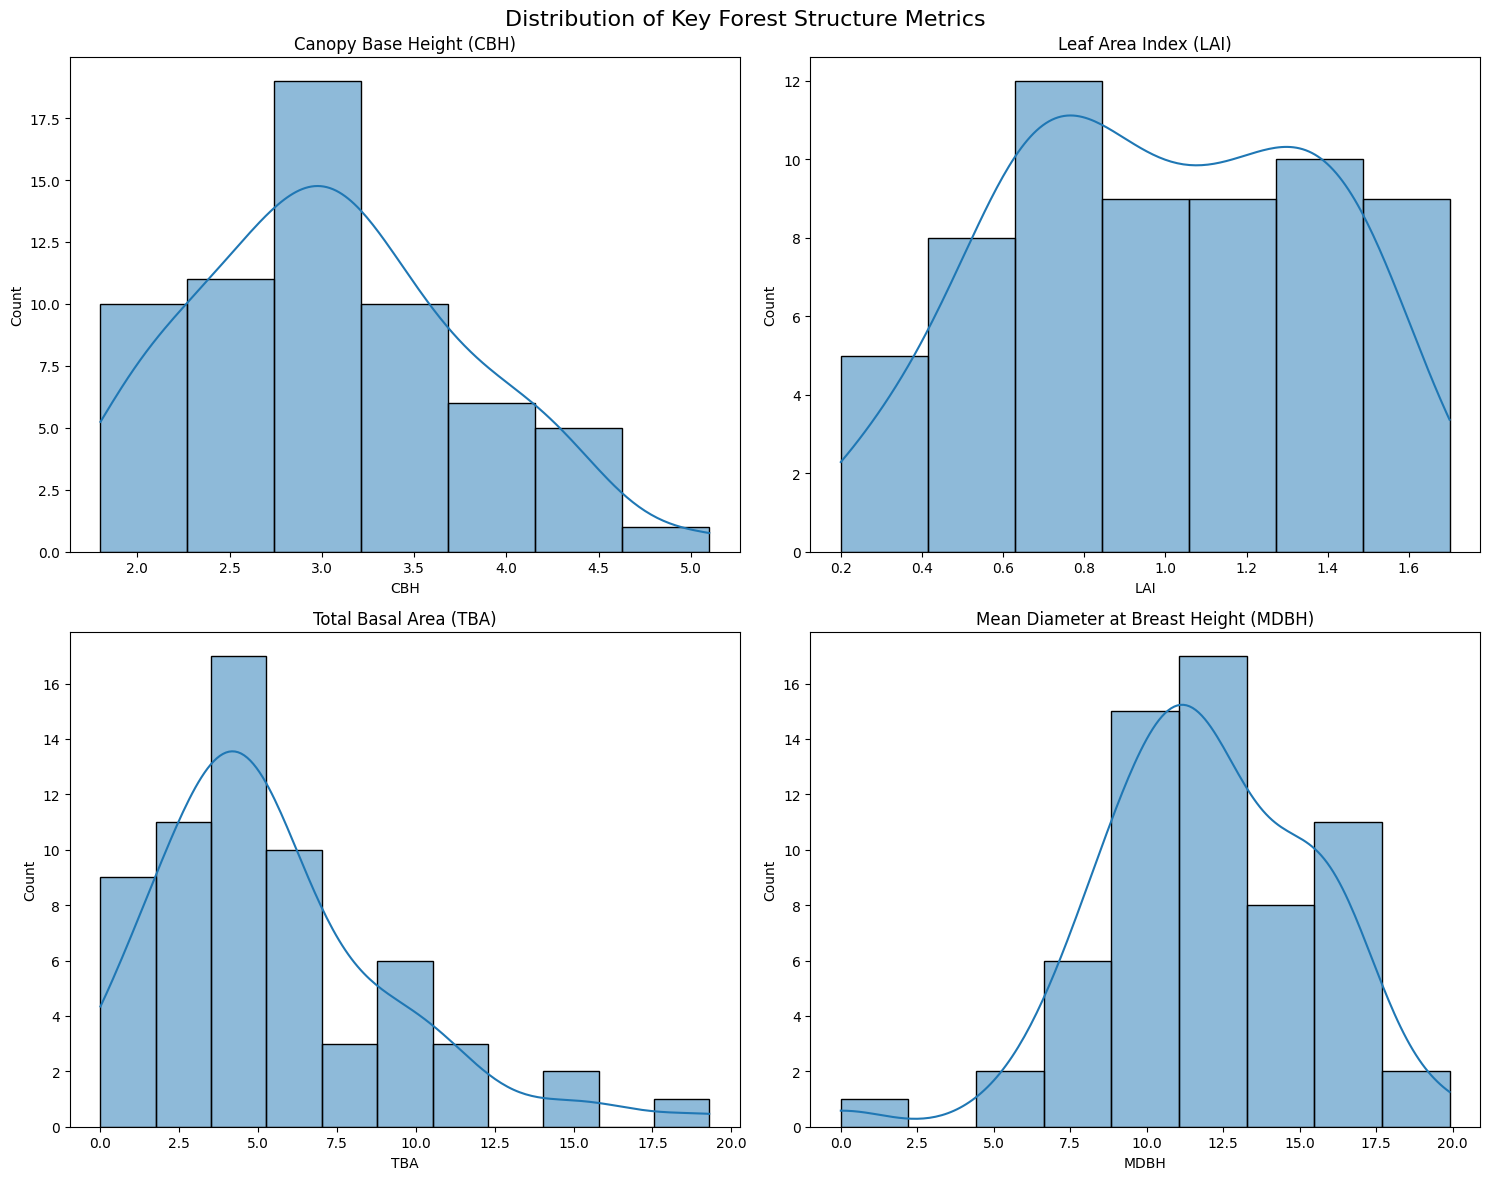

In [4]:
# Distribution of key metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Key Forest Structure Metrics', fontsize=16)

sns.histplot(data=df, x='CBH', kde=True, ax=axes[0,0])
axes[0,0].set_title('Canopy Base Height (CBH)')

sns.histplot(data=df, x='LAI', kde=True, ax=axes[0,1])
axes[0,1].set_title('Leaf Area Index (LAI)')

sns.histplot(data=df, x='TBA', kde=True, ax=axes[1,0])
axes[1,0].set_title('Total Basal Area (TBA)')

sns.histplot(data=df, x='MDBH', kde=True, ax=axes[1,1])
axes[1,1].set_title('Mean Diameter at Breast Height (MDBH)')

plt.tight_layout()

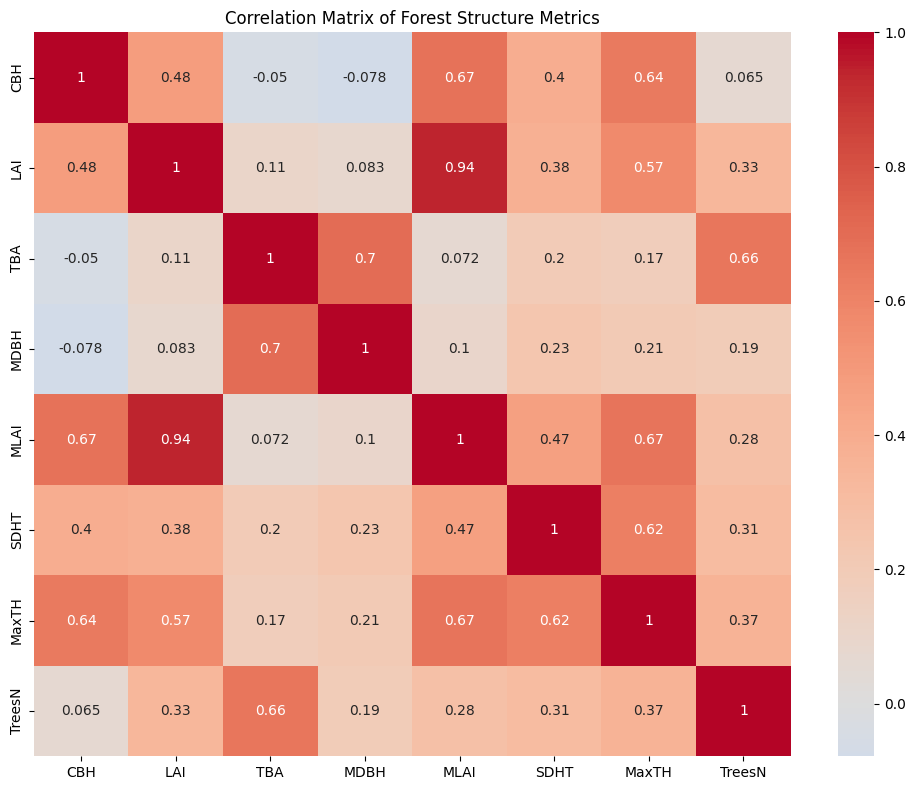

In [5]:
# Select numerical columns for correlation analysis
numerical_cols = ['CBH', 'LAI', 'TBA', 'MDBH', 'MLAI', 'SDHT', 'MaxTH', 'TreesN']
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Forest Structure Metrics')
plt.tight_layout()

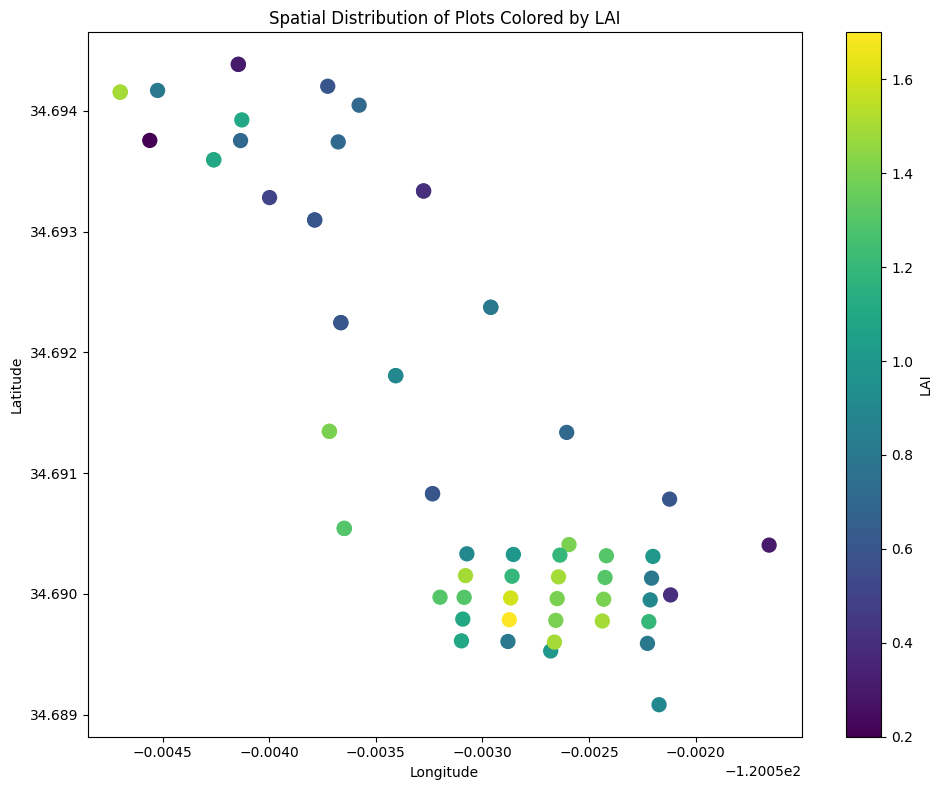

In [6]:
# Extract latitude and longitude
df['latitude'] = df['latlon'].apply(lambda x: eval(x)[0])
df['longitude'] = df['latlon'].apply(lambda x: eval(x)[1])

# Create scatter plot of plot locations colored by LAI
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['LAI'], 
                     cmap='viridis', s=100)
plt.colorbar(scatter, label='LAI')
plt.title('Spatial Distribution of Plots Colored by LAI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

In [31]:
def analyze_column(df, column_name):
    """
    Analyze a single column with appropriate visualizations and statistics based on its type
    """
    if column_name in ['PLOT_NAME', 'latlon', 'Unnamed: 0']:
        return
        
    description = COLUMN_DESCRIPTIONS.get(column_name, 'No description available')
    
    # Get column data type
    dtype = df[column_name].dtype
    
    if np.issubdtype(dtype, np.number):
        # Numerical column analysis
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        fig.suptitle(f'{column_name}\n{description}', fontsize=16)
        
        # Distribution plot
        sns.histplot(data=df, x=column_name, kde=True, ax=ax1)
        ax1.set_title('Distribution')
        
        # Box plot
        sns.boxplot(y=df[column_name], ax=ax2)
        ax2.set_title('Box Plot')
        
    else:
        # Categorical column analysis
        fig = plt.figure(figsize=(20, 8))
        
        # Create a single subplot for the bar plot
        ax1 = plt.subplot(121)
        
        # Create a larger subplot for the pie chart
        ax2 = plt.subplot(122)
        
        fig.suptitle(f'{column_name}\n{description}', fontsize=16)
        
        value_counts = df[column_name].value_counts()
        
        # Bar plot
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax1)
        ax1.set_title('Value Counts')
        ax1.tick_params(axis='x', rotation=45)
        
        # Pie chart with better layout
        patches, texts, autotexts = ax2.pie(
            value_counts.values, 
            labels=value_counts.index, 
            autopct='%1.1f%%',
            pctdistance=0.85,
            labeldistance=1.1
        )
        # Make pie chart labels more readable
        plt.setp(autotexts, size=9, weight="bold")
        plt.setp(texts, size=9)
        ax2.set_title('Percentage Distribution')
        
    plt.tight_layout()
    
    # Calculate and print statistics
    print(f"\n{'='*80}")
    print(f"Analysis of {column_name}")
    print(f"Description: {description}")
    print(f"{'='*80}")
    
    if np.issubdtype(dtype, np.number):
        stats_dict = calculate_numerical_stats(df[column_name])
    else:
        stats_dict = calculate_categorical_stats(df[column_name])
        
    for stat, value in stats_dict.items():
        print(f"{stat}: {value:.4f}" if isinstance(value, float) else f"{stat}: {value}")
    print(f"{'='*80}\n")
    
    plt.show()

def calculate_numerical_stats(series):
    """Calculate statistics for numerical columns"""
    return {
        'Count': len(series),
        'Missing': series.isnull().sum(),
        'Mean': series.mean(),
        'Median': series.median(),
        'Std Dev': series.std(),
        'Skewness': series.skew(),
        'Kurtosis': series.kurtosis(),
        'IQR': series.quantile(0.75) - series.quantile(0.25),
        'Range': series.max() - series.min()
    }

def calculate_categorical_stats(series):
    """Calculate statistics for categorical columns"""
    value_counts = series.value_counts()
    return {
        'Count': len(series),
        'Missing': series.isnull().sum(),
        'Unique Values': series.nunique(),
        'Mode': series.mode()[0],
        'Mode Frequency': value_counts.iloc[0],
        'Mode Percentage': (value_counts.iloc[0] / len(series)) * 100
    }

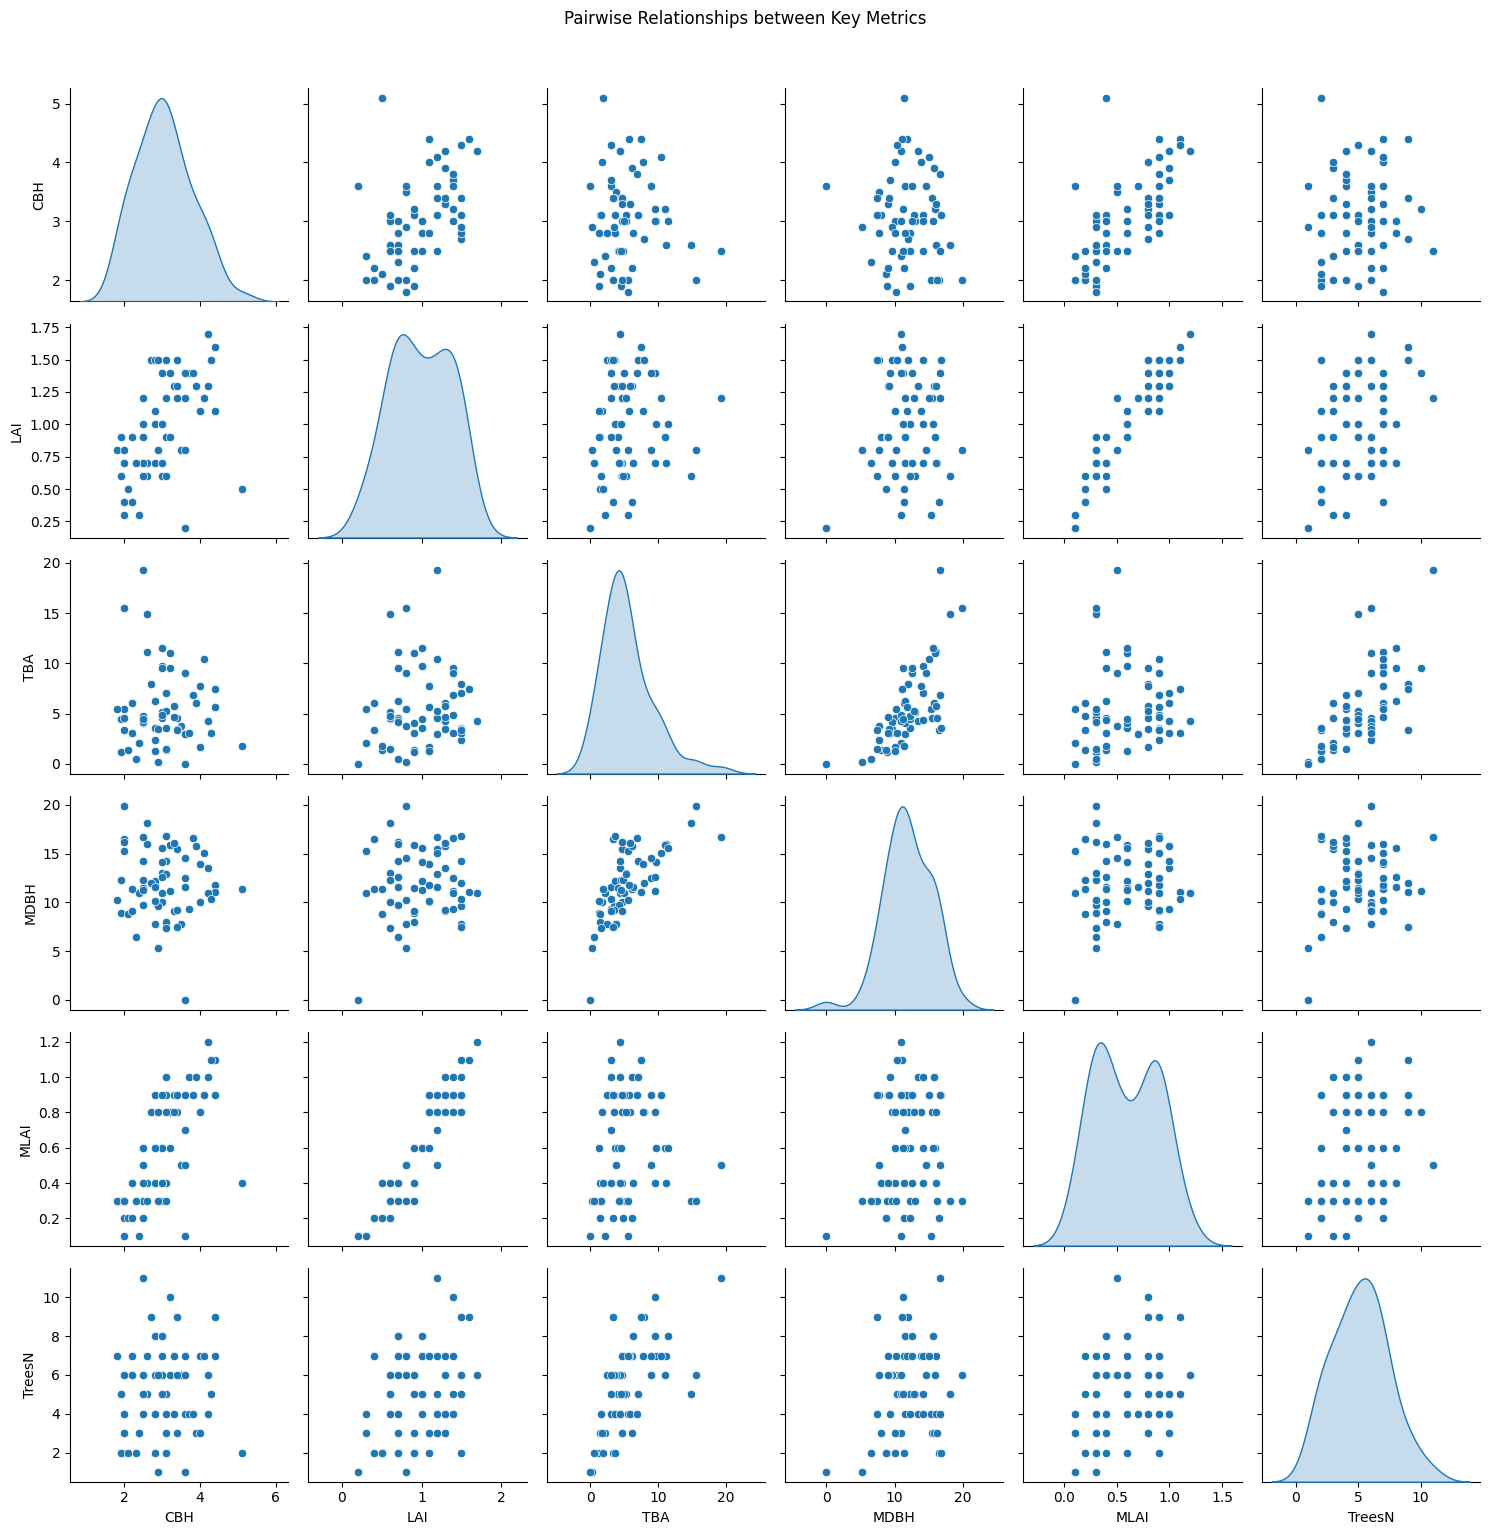

In [13]:
# Select key metrics for pairplot
key_metrics = ['CBH', 'LAI', 'TBA', 'MDBH', 'MLAI', 'TreesN']

# Create pairplot
sns.pairplot(df[key_metrics], diag_kind='kde')
plt.suptitle('Pairwise Relationships between Key Metrics', y=1.02)
plt.tight_layout()


Analysis of CBH
Description: Canopy Base Height (m) - Height from ground to live crown
Count: 62
Missing: 0
Mean: 3.0548
Median: 3.0000
Std Dev: 0.7381
Skewness: 0.3983
Kurtosis: -0.2163
IQR: 1.0750
Range: 3.3000



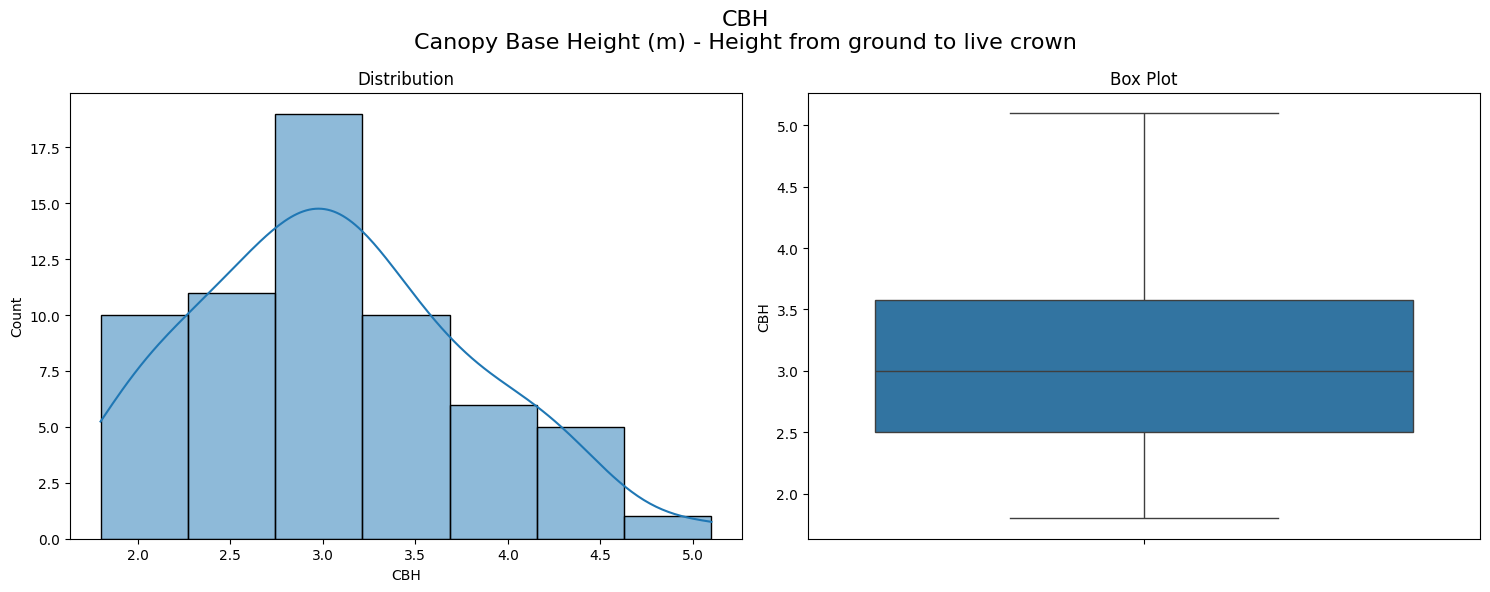


Analysis of LAI
Description: Leaf Area Index - Total leaf area per unit ground area
Count: 62
Missing: 0
Mean: 0.9887
Median: 1.0000
Std Dev: 0.3790
Skewness: -0.0834
Kurtosis: -0.9984
IQR: 0.6000
Range: 1.5000



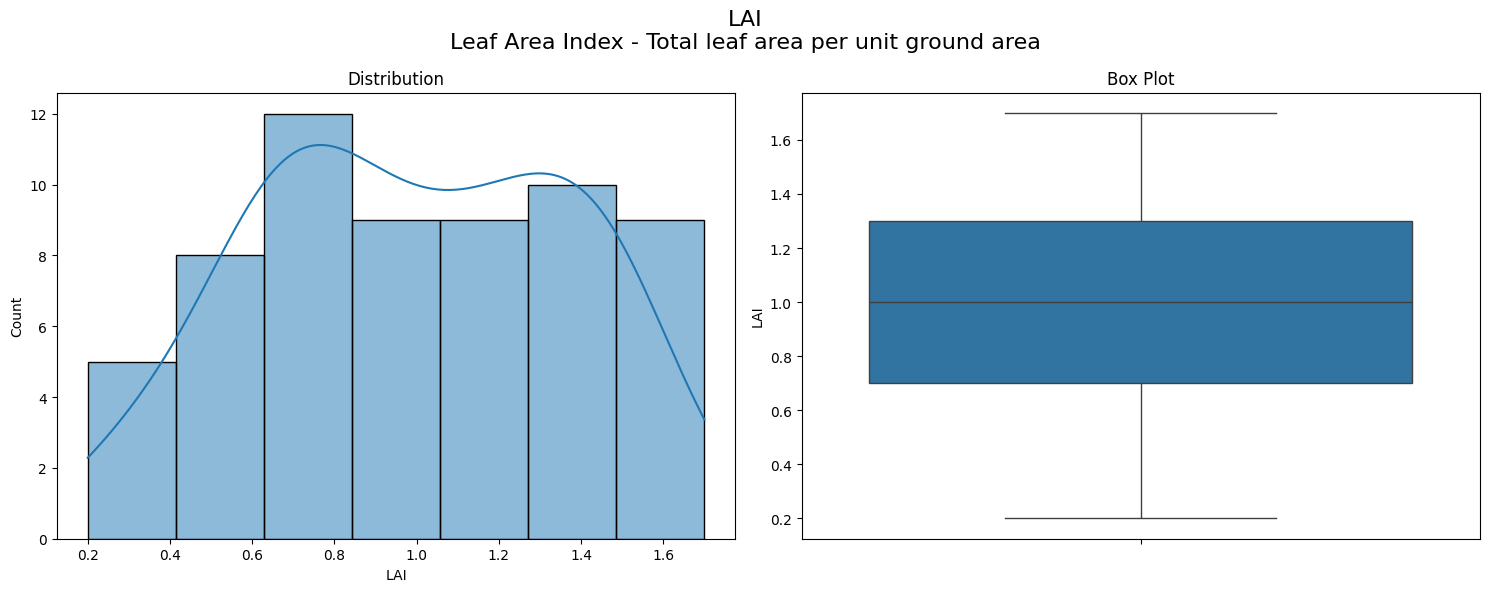


Analysis of TBA
Description: Total Basal Area (m²/ha) - Cross-sectional area of all trees
Count: 62
Missing: 0
Mean: 5.4806
Median: 4.6000
Std Dev: 3.7913
Skewness: 1.3725
Kurtosis: 2.4560
IQR: 3.7750
Range: 19.3000



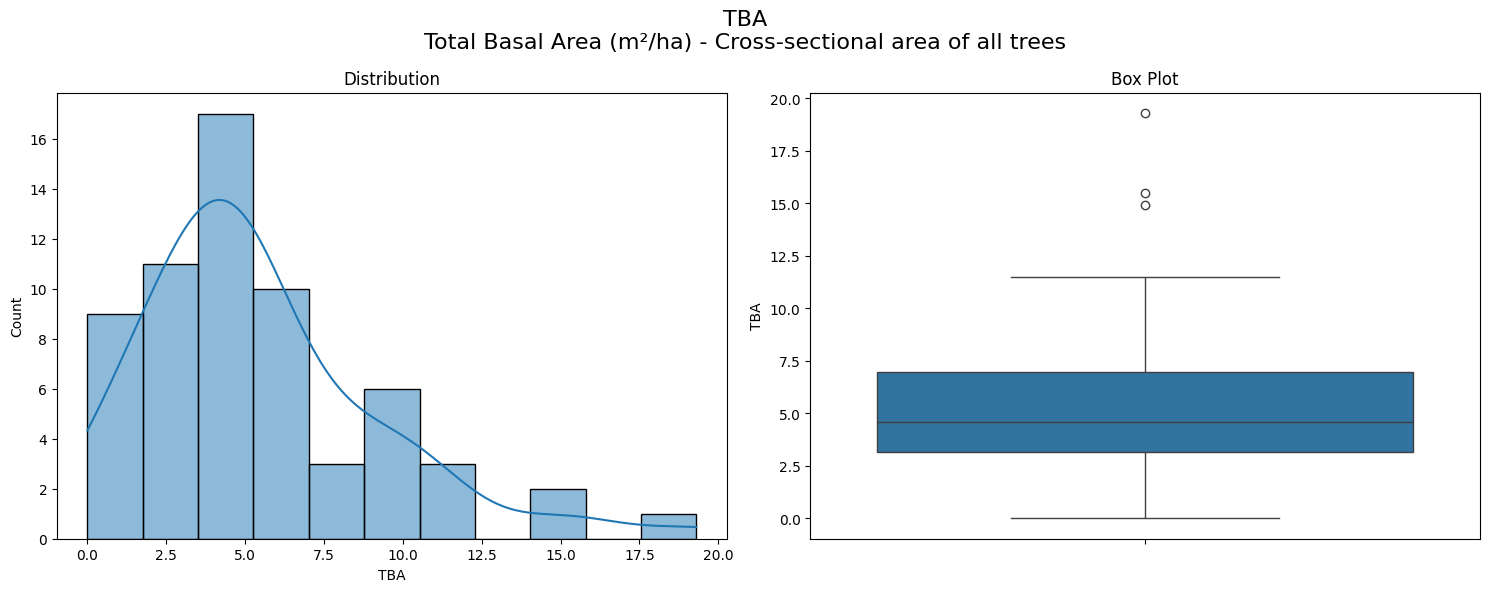


Analysis of MDBH
Description: Mean Diameter at Breast Height (cm) - Average tree diameter at 1.37m
Count: 62
Missing: 0
Mean: 11.9500
Median: 11.6000
Std Dev: 3.4826
Skewness: -0.4182
Kurtosis: 1.1345
IQR: 4.7250
Range: 19.9000



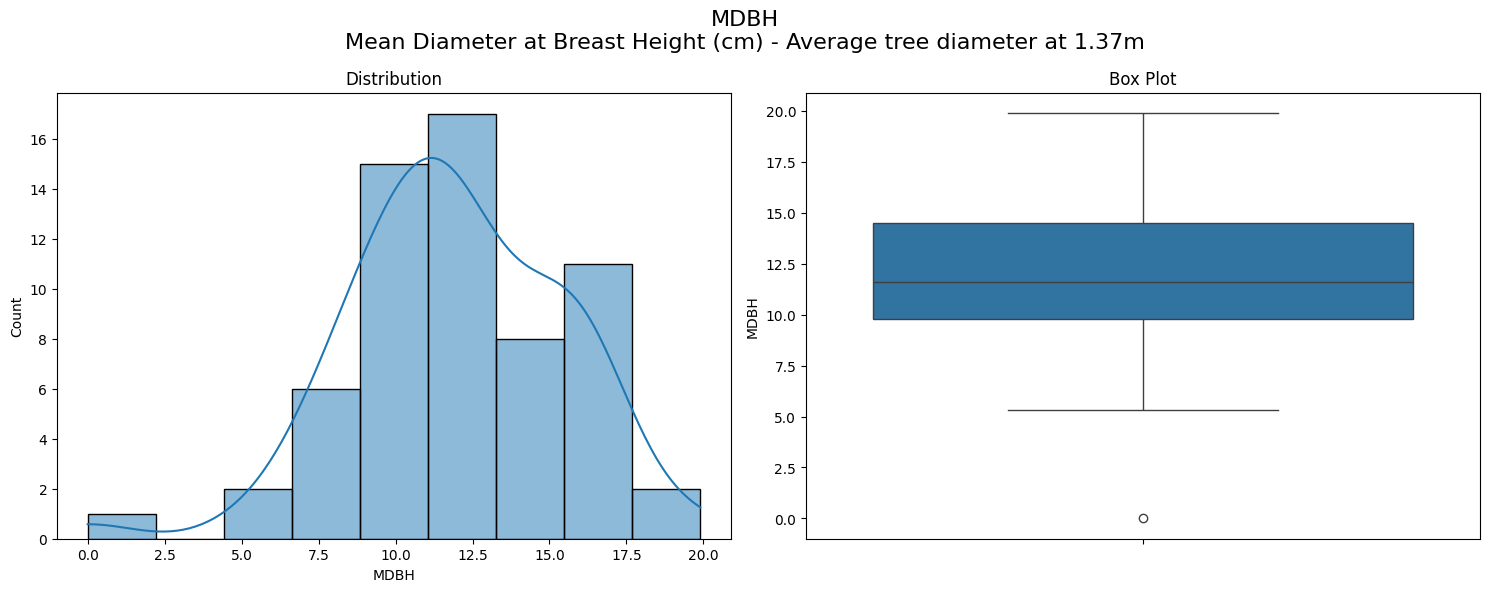


Analysis of MLAI
Description: Mean Leaf Area Index - Average LAI per tree
Count: 62
Missing: 0
Mean: 0.5935
Median: 0.6000
Std Dev: 0.2991
Skewness: 0.1061
Kurtosis: -1.2416
IQR: 0.6000
Range: 1.1000



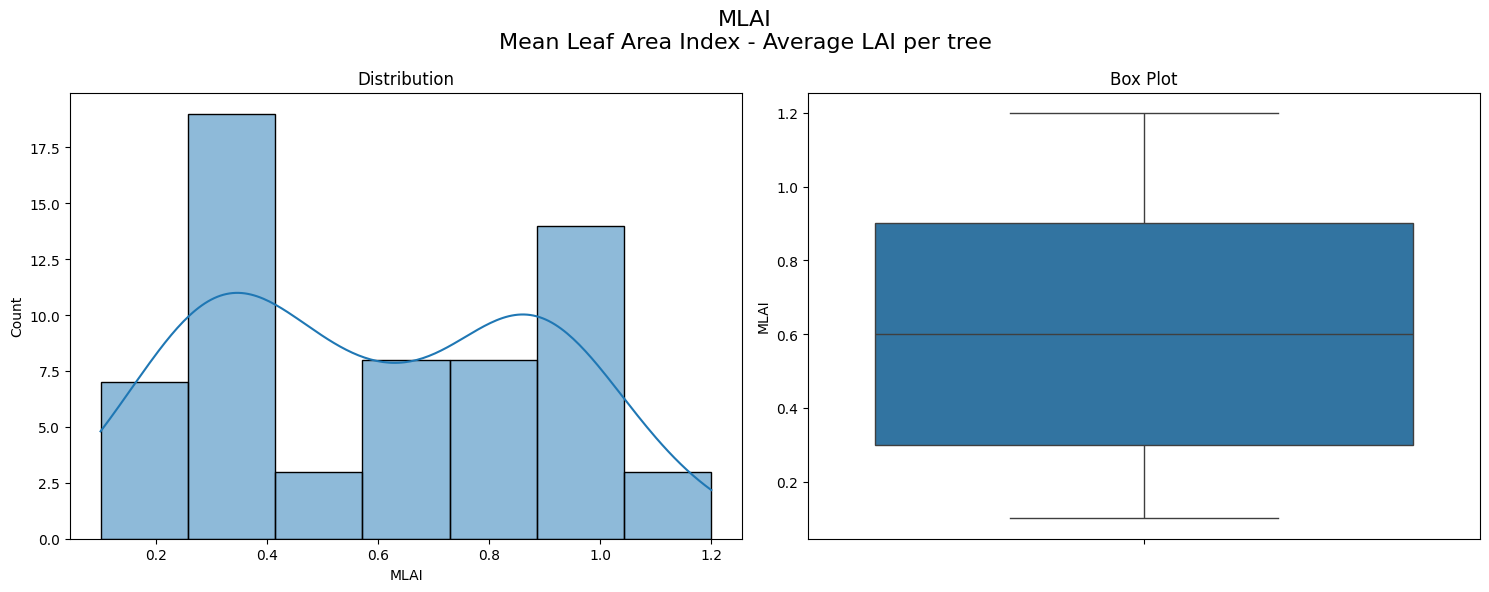


Analysis of OLAI
Description: Overstory Leaf Area Index - LAI of upper canopy
Count: 62
Missing: 0
Mean: 0.0323
Median: 0.0000
Std Dev: 0.0566
Skewness: 1.5875
Kurtosis: 1.6351
IQR: 0.1000
Range: 0.2000



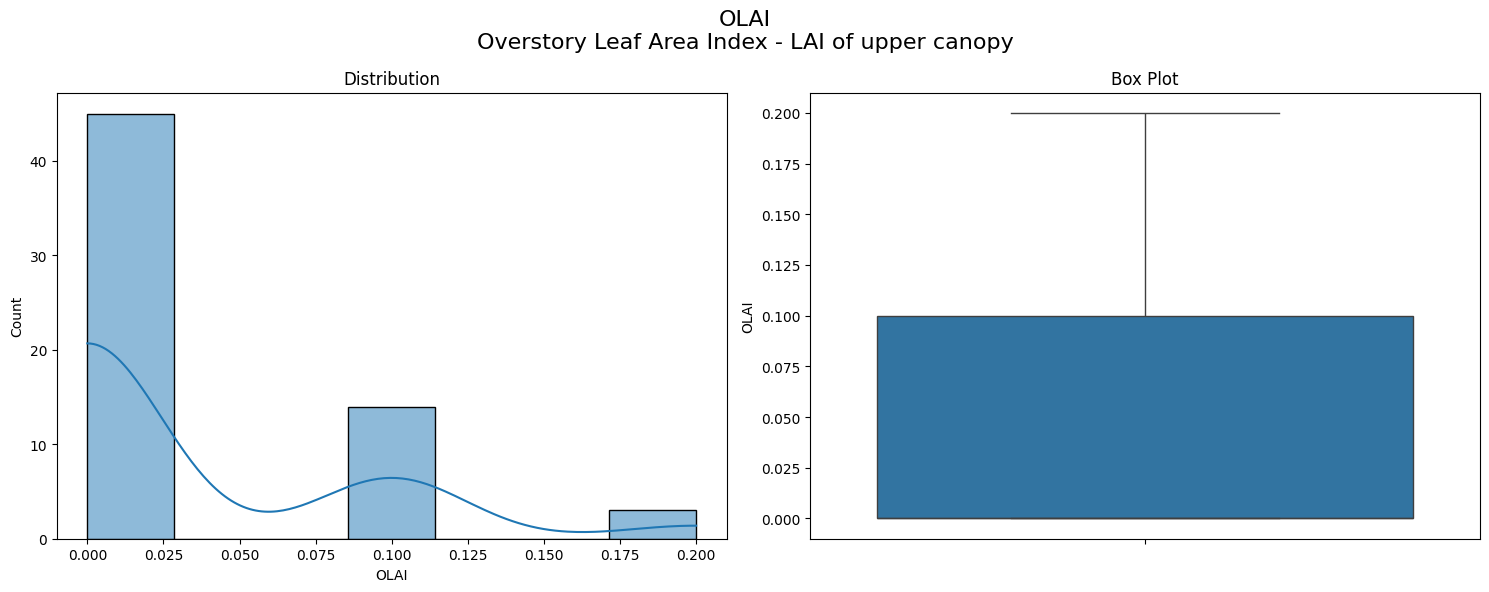


Analysis of SDHT
Description: Standard Deviation of Height (m) - Variation in tree heights
Count: 62
Missing: 0
Mean: 1.4742
Median: 1.5000
Std Dev: 0.7538
Skewness: 0.4236
Kurtosis: 0.6081
IQR: 0.7750
Range: 3.7000



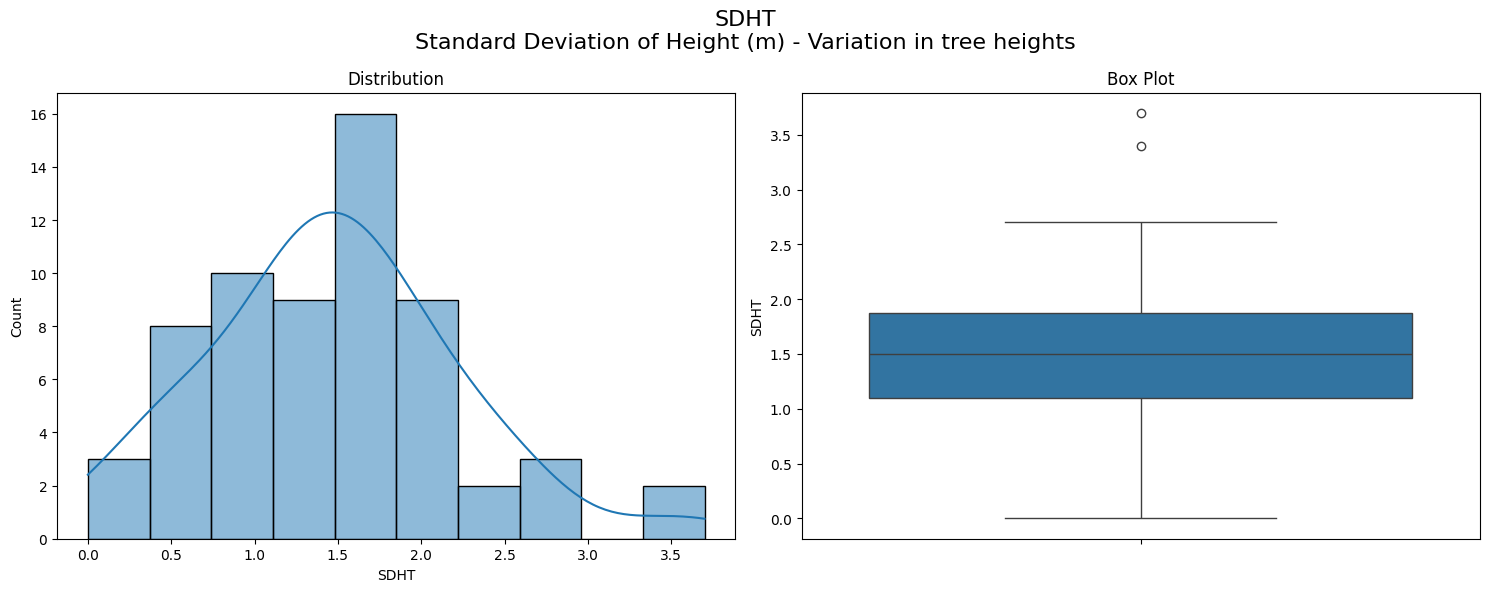


Analysis of SDSD
Description: Standard Deviation of Stem Density - Variation in tree density
Count: 62
Missing: 0
Mean: 5.9484
Median: 6.2000
Std Dev: 1.1116
Skewness: -1.0347
Kurtosis: 1.5433
IQR: 1.3750
Range: 5.8000



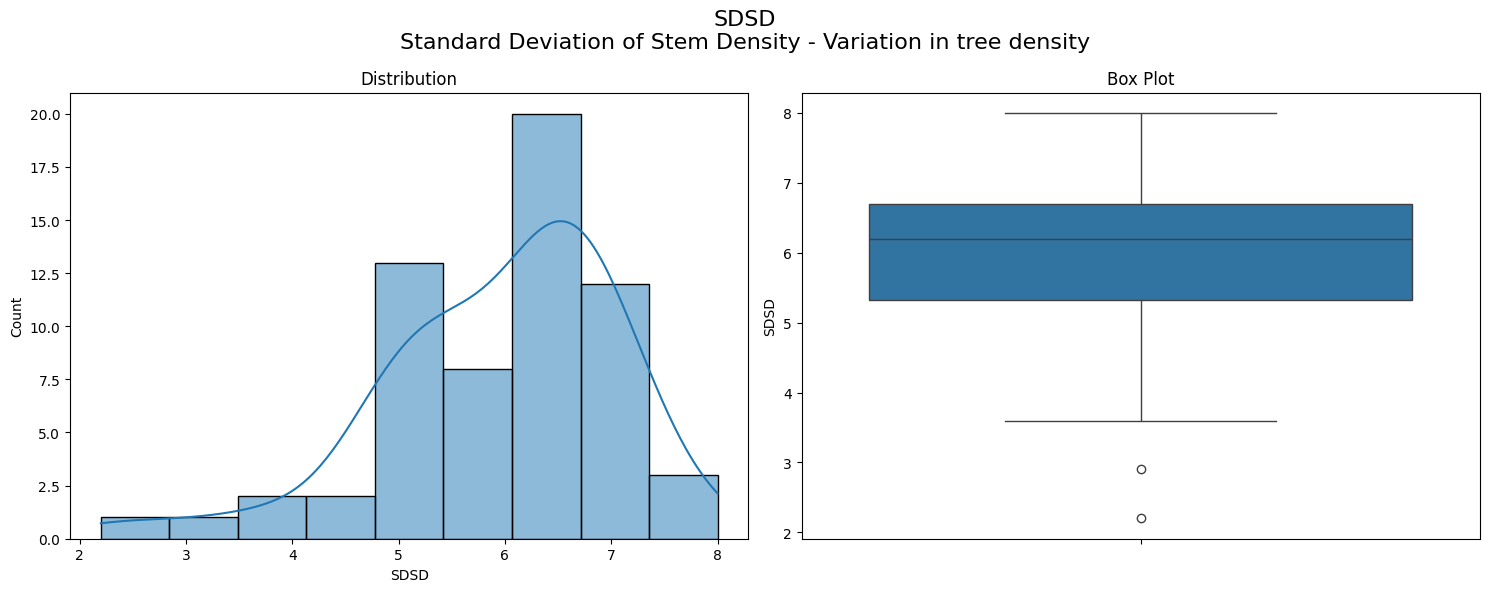


Analysis of ULAI
Description: Understory Leaf Area Index - LAI of lower canopy
Count: 62
Missing: 0
Mean: 0.5323
Median: 0.5000
Std Dev: 0.1862
Skewness: 0.0766
Kurtosis: 0.1306
IQR: 0.2000
Range: 0.9000



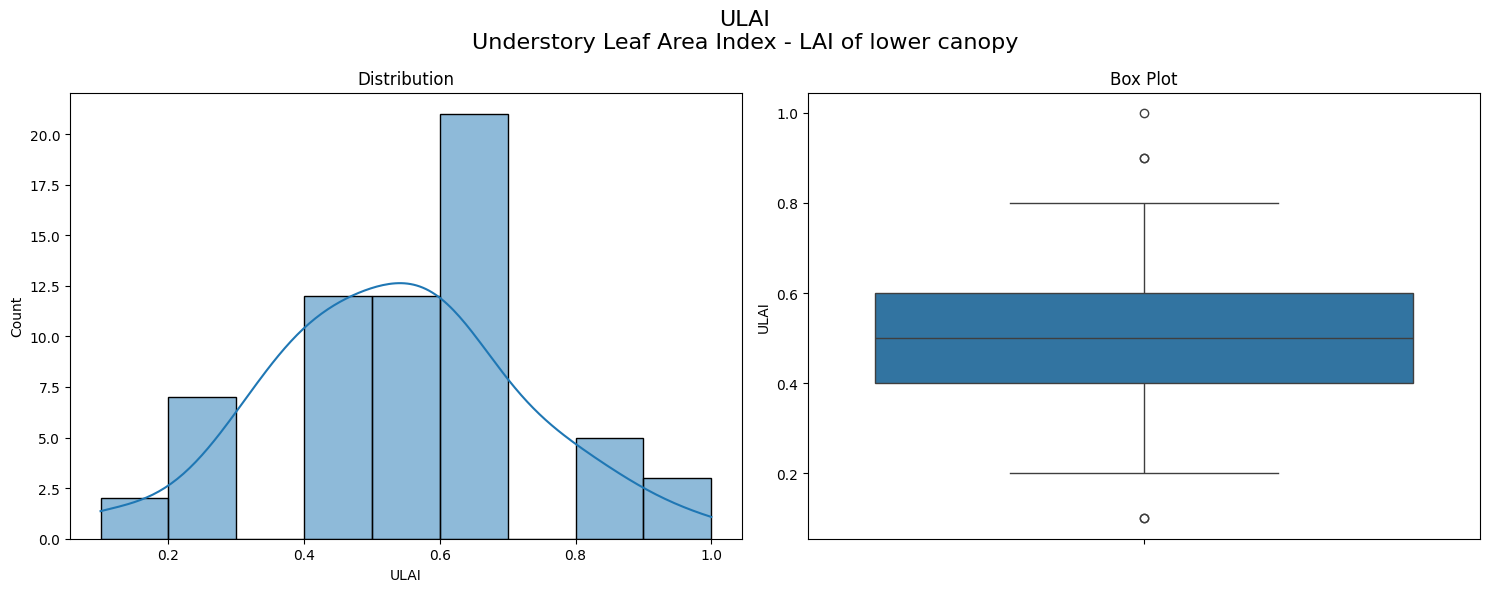


Analysis of GCvol
Description: Ground Cover Volume (m³) - Volume of ground vegetation
Count: 62
Missing: 0
Mean: 0.1032
Median: 0.1000
Std Dev: 0.0178
Skewness: 5.4268
Kurtosis: 28.3650
IQR: 0.0000
Range: 0.1000



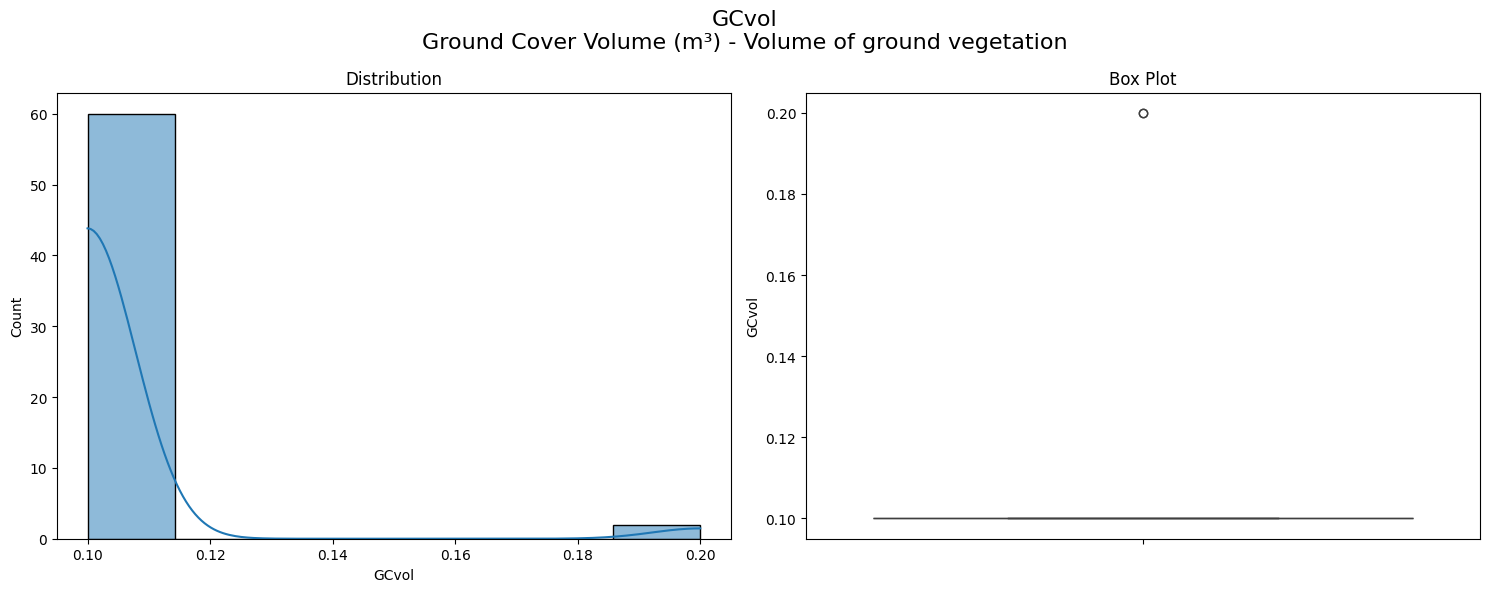


Analysis of MSvol
Description: Mid-Story Volume (m³) - Volume of mid-canopy vegetation
Count: 62
Missing: 0
Mean: 0.1742
Median: 0.2000
Std Dev: 0.0904
Skewness: -0.2824
Kurtosis: -0.6346
IQR: 0.1000
Range: 0.3000



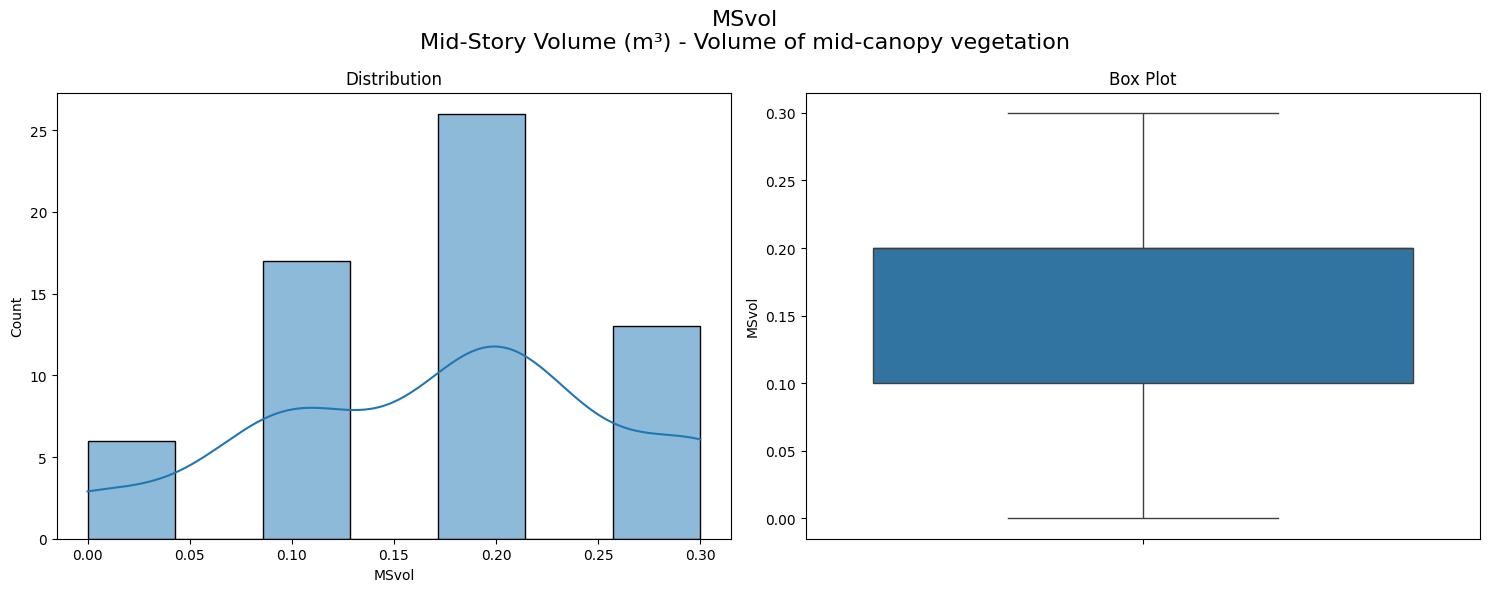


Analysis of MaxSD
Description: Maximum Stem Density (stems/ha) - Highest tree density
Count: 62
Missing: 0
Mean: 24.0113
Median: 25.6000
Std Dev: 4.6437
Skewness: -1.5542
Kurtosis: 2.3577
IQR: 4.8750
Range: 20.8000



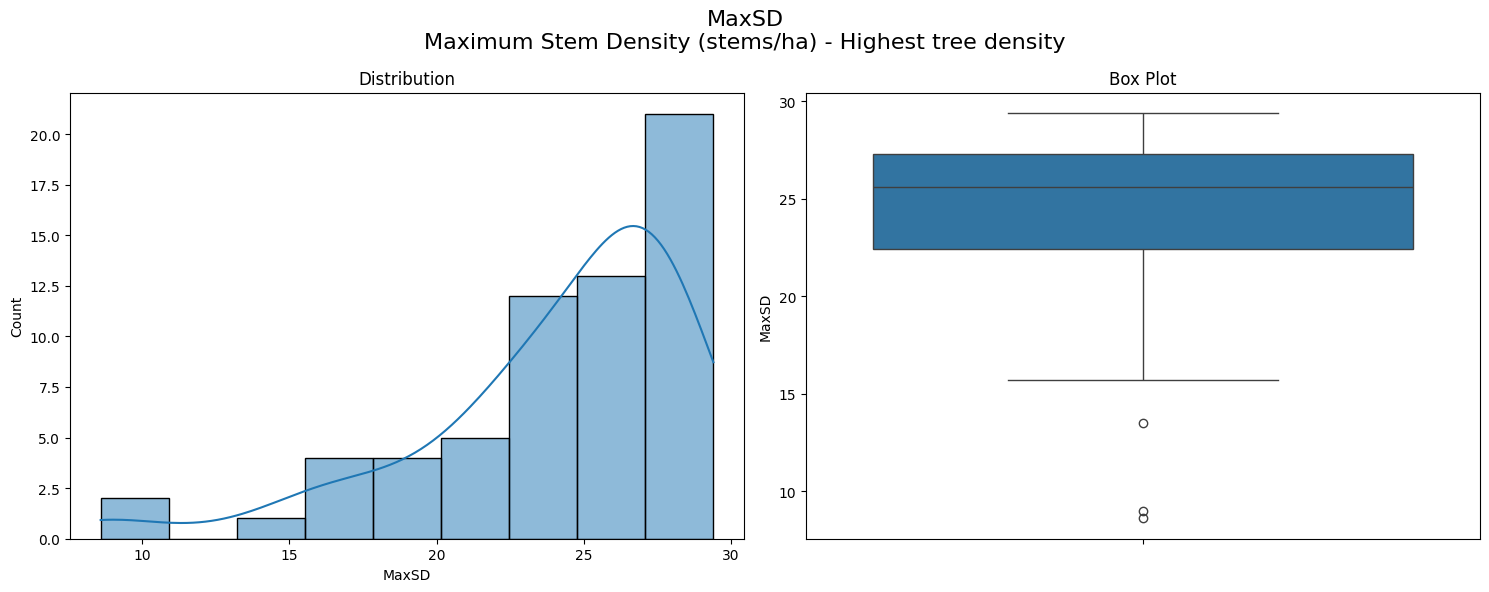


Analysis of MaxSH
Description: Maximum Shrub Height (m) - Tallest shrub measurement
Count: 62
Missing: 0
Mean: 3.0000
Median: 3.0000
Std Dev: 0.0000
Skewness: 0.0000
Kurtosis: 0.0000
IQR: 0.0000
Range: 0.0000



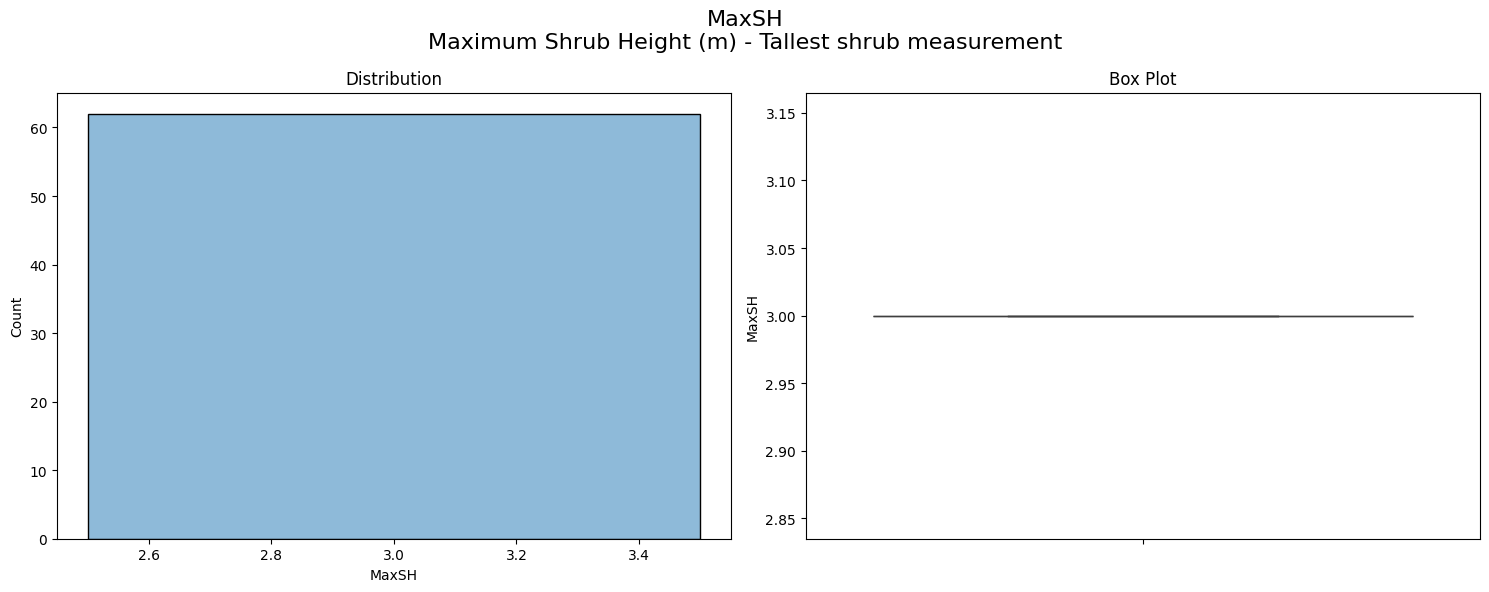


Analysis of MaxTH
Description: Maximum Tree Height (m) - Tallest tree measurement
Count: 62
Missing: 0
Mean: 10.0532
Median: 10.3500
Std Dev: 2.8451
Skewness: -0.6993
Kurtosis: 1.2003
IQR: 3.9750
Range: 14.6000



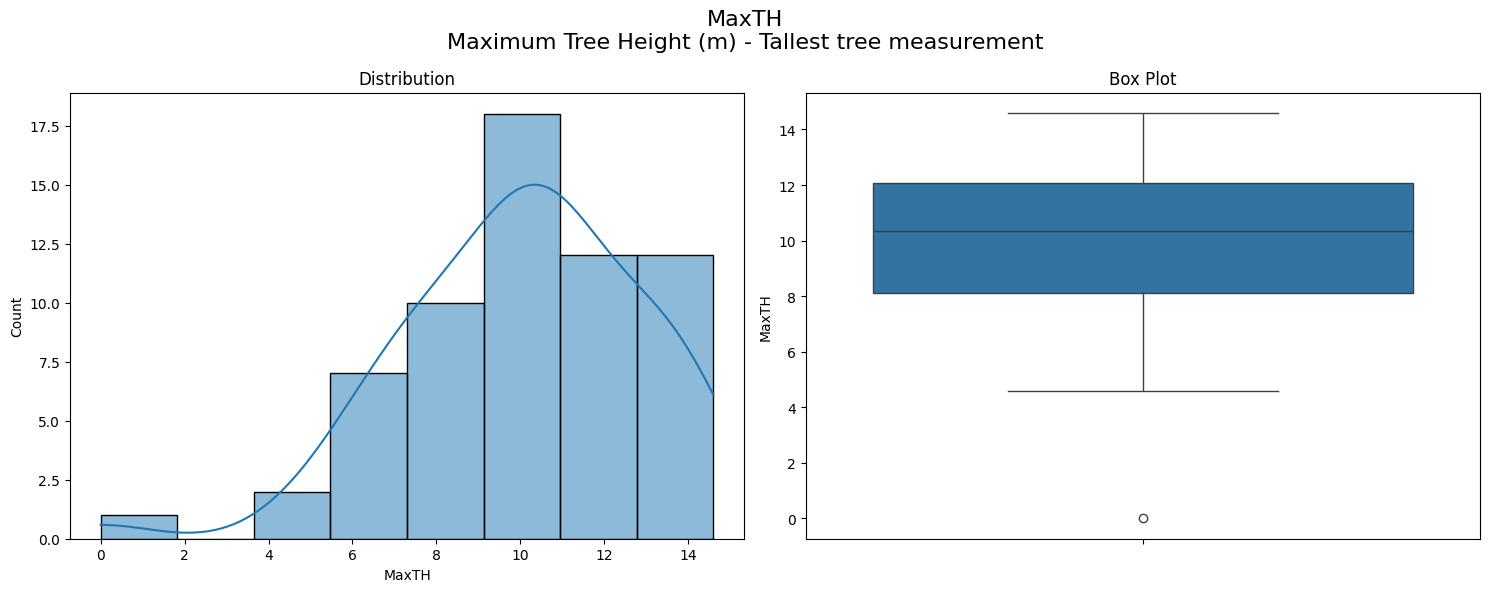


Analysis of MinSD
Description: Minimum Stem Density (stems/ha) - Lowest tree density
Count: 62
Missing: 0
Mean: 0.0000
Median: 0.0000
Std Dev: 0.0000
Skewness: 0.0000
Kurtosis: 0.0000
IQR: 0.0000
Range: 0



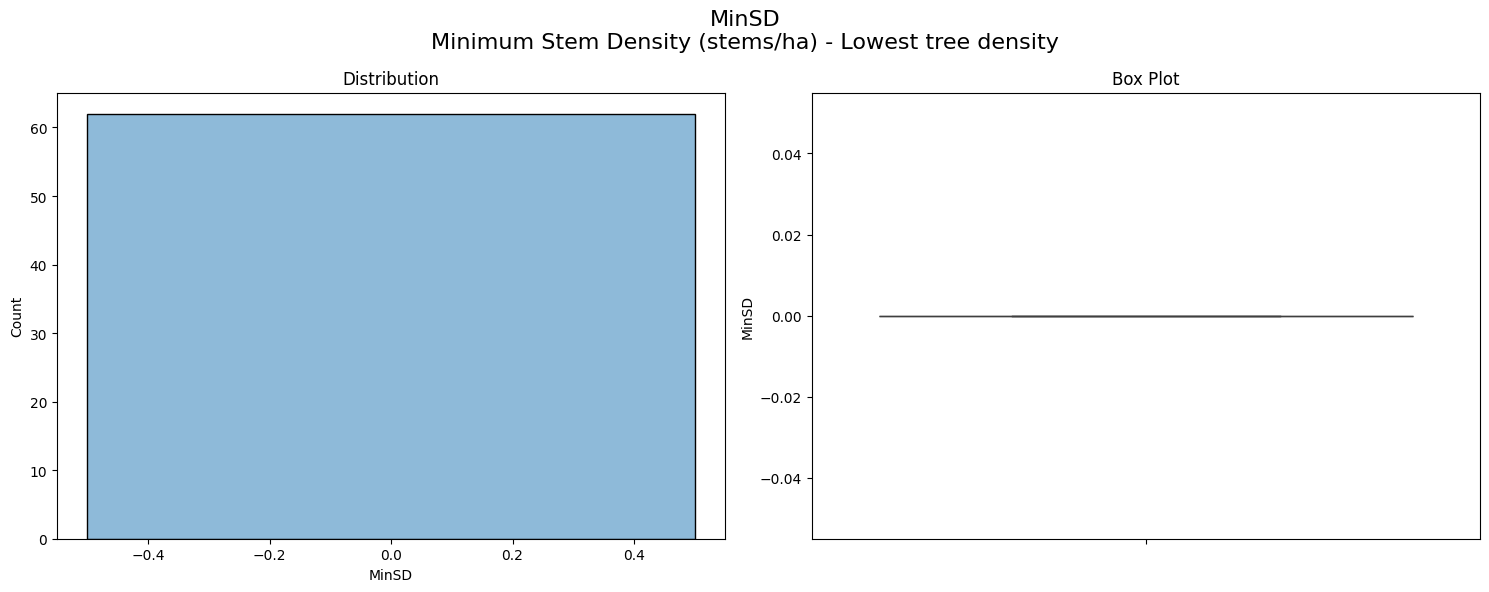


Analysis of OSvol
Description: Overstory Volume (m³) - Volume of overstory vegetation
Count: 62
Missing: 0
Mean: 0.0129
Median: 0.0000
Std Dev: 0.0338
Skewness: 2.2684
Kurtosis: 3.2496
IQR: 0.0000
Range: 0.1000



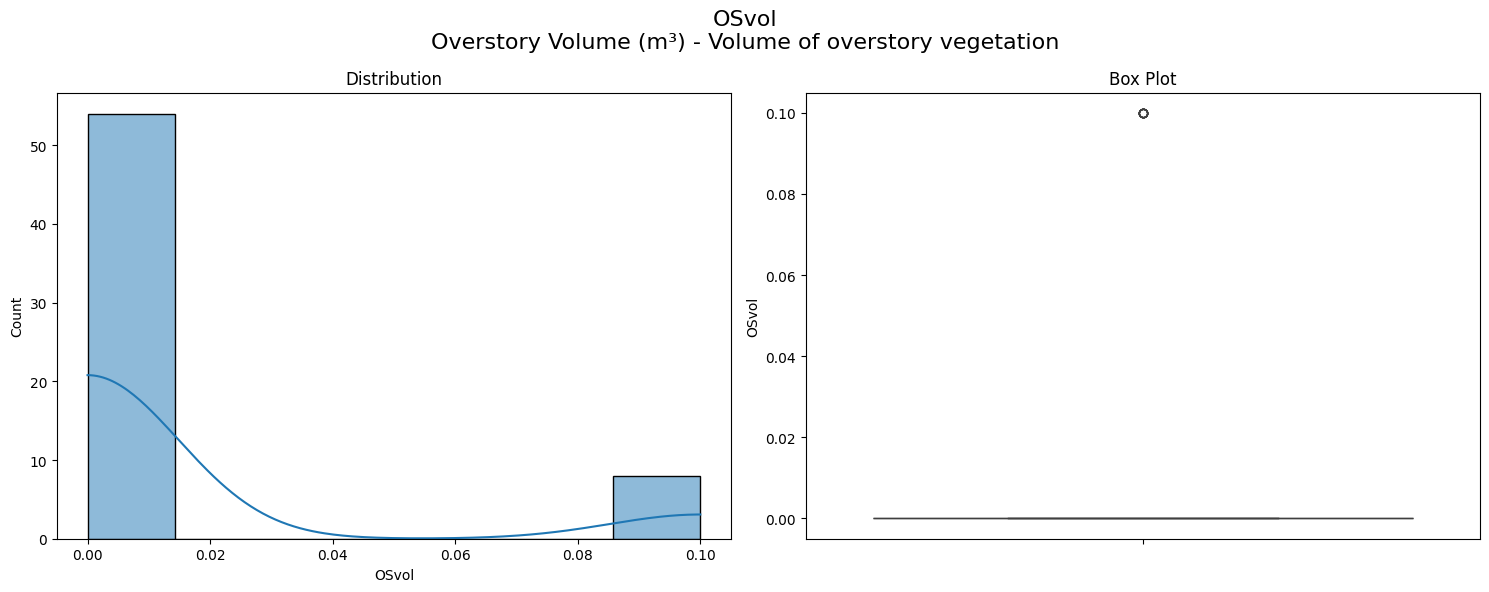


Analysis of SDSHT
Description: Standard Deviation of Shrub Height (m) - Variation in shrub heights
Count: 62
Missing: 0
Mean: 0.2452
Median: 0.2000
Std Dev: 0.1715
Skewness: 0.3874
Kurtosis: -0.2876
IQR: 0.3000
Range: 0.7000



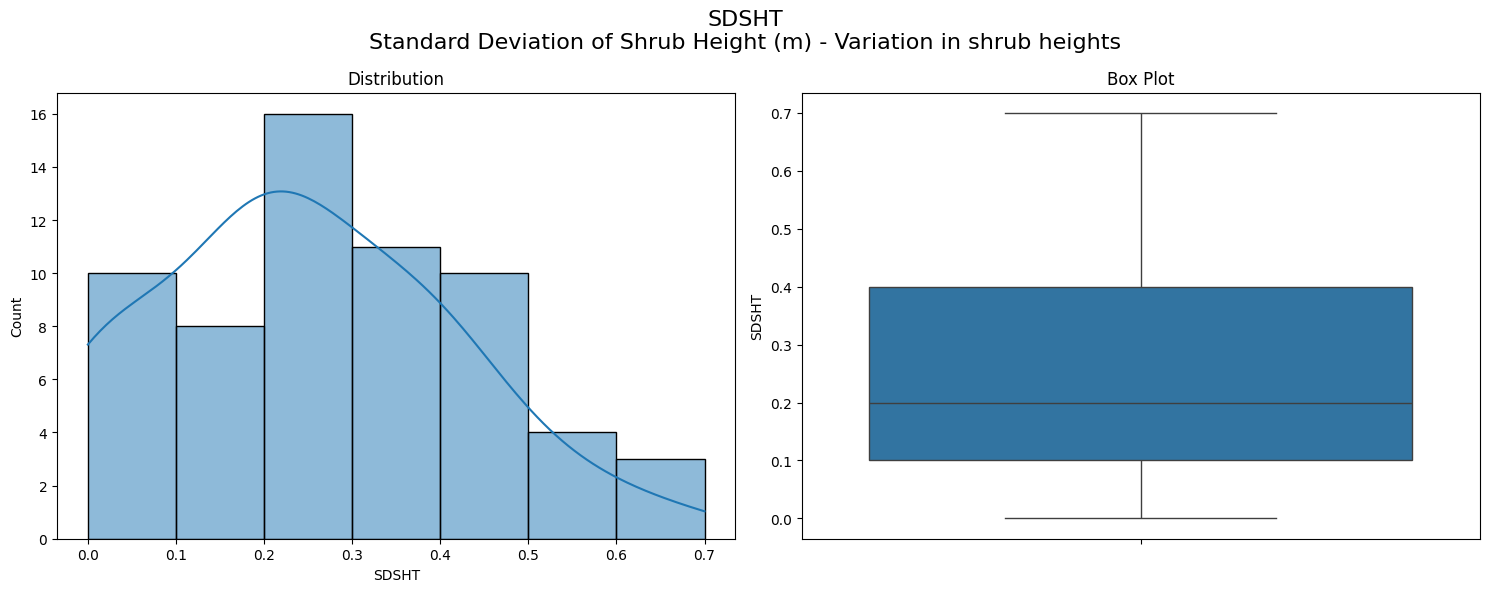


Analysis of USvol
Description: Understory Volume (m³) - Volume of understory vegetation
Count: 62
Missing: 0
Mean: 0.0645
Median: 0.1000
Std Dev: 0.0482
Skewness: -0.6219
Kurtosis: -1.6681
IQR: 0.1000
Range: 0.1000



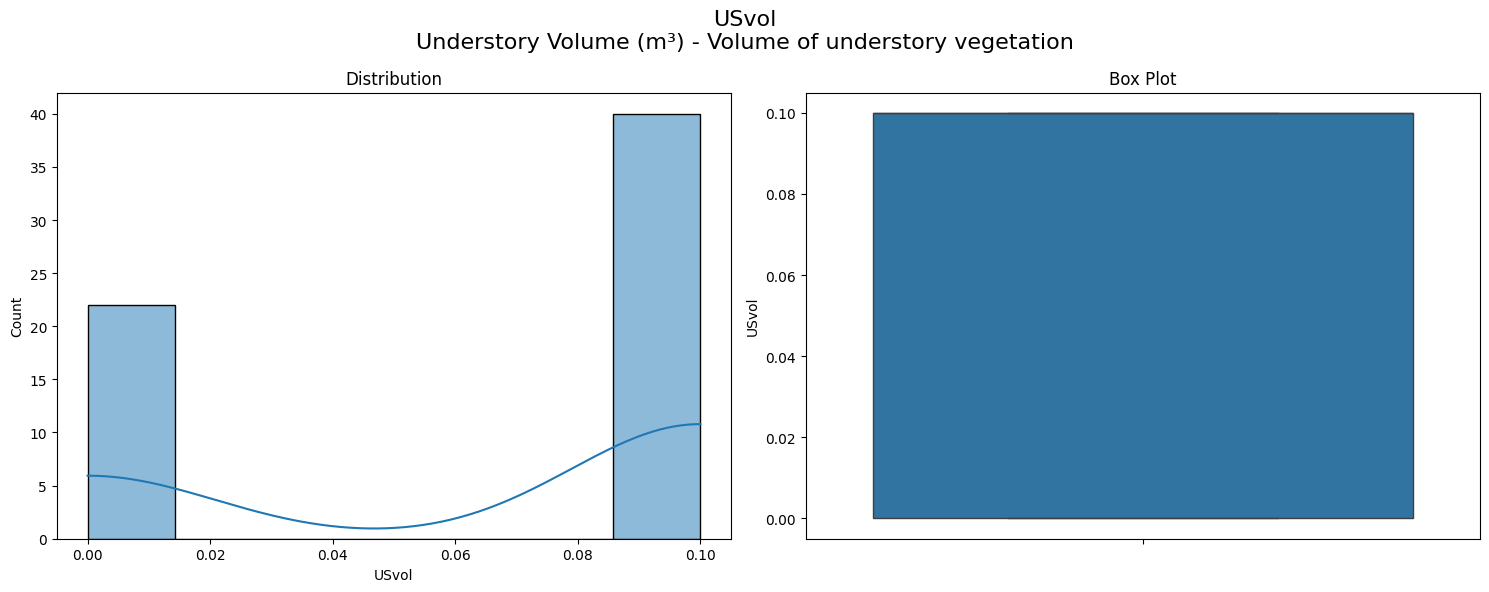


Analysis of LF_ASP
Description: Aspect (degrees) - Direction slope faces
Count: 62
Missing: 0
Mean: 211.9516
Median: 226.5000
Std Dev: 53.5048
Skewness: -1.7201
Kurtosis: 3.3656
IQR: 54.2500
Range: 263



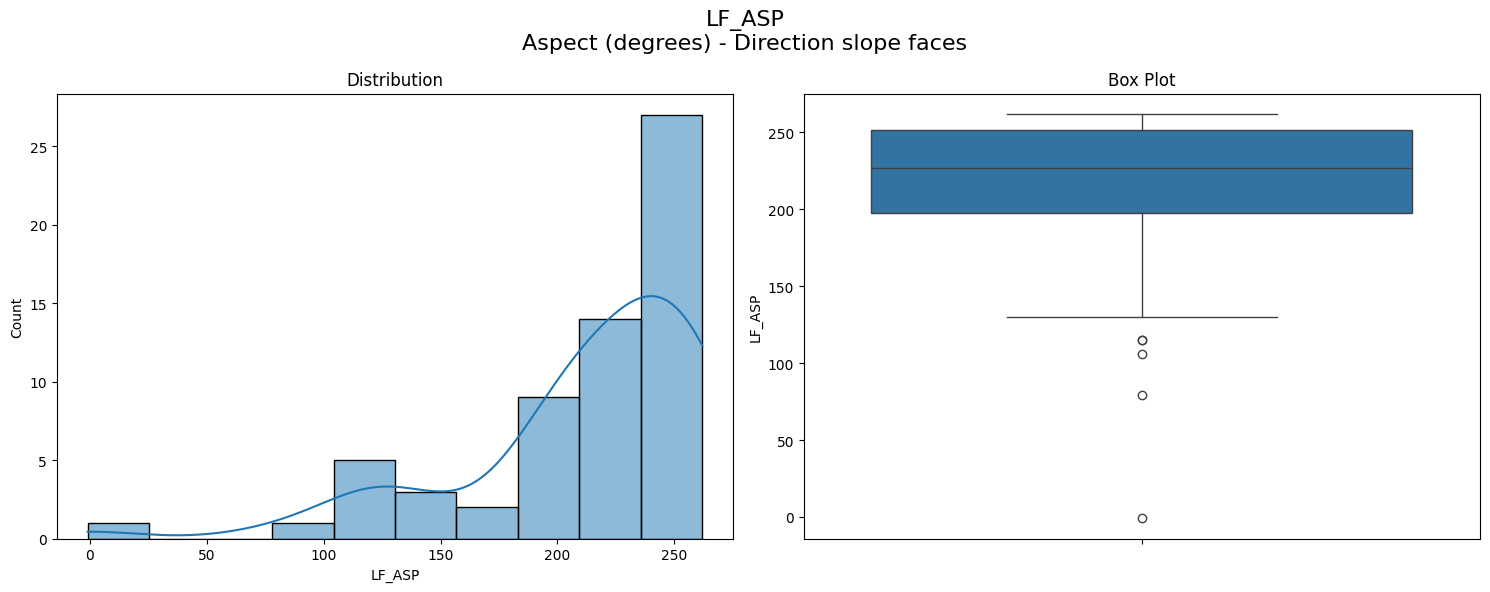


Analysis of LF_CBD
Description: Canopy Bulk Density - Density of canopy fuels
Count: 62
Missing: 0
Mean: 1.3226
Median: 0.0000
Std Dev: 2.2672
Skewness: 1.5037
Kurtosis: 0.4537
IQR: 1.0000
Range: 6



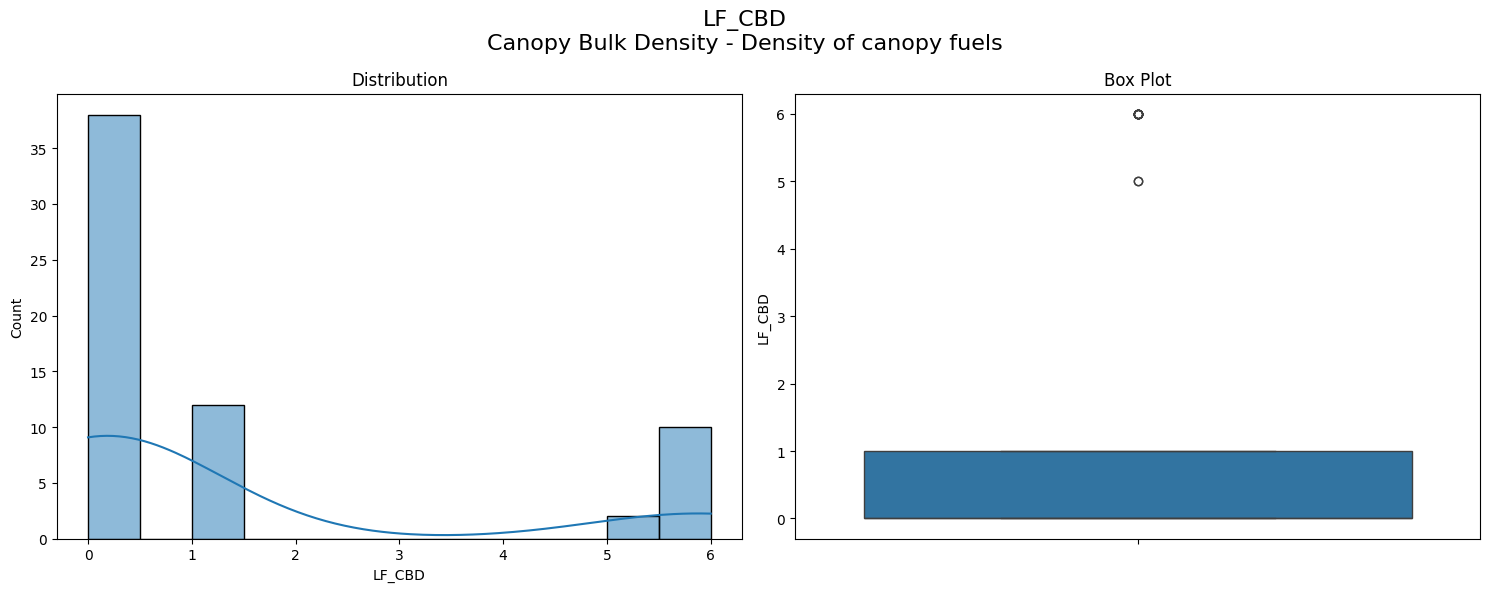


Analysis of LF_EVC
Description: Existing Vegetation Cover - Current vegetation coverage
Count: 62
Missing: 0
Unique Values: 21
Mode: Shrub Cover = 46%
Mode Frequency: 7
Mode Percentage: 11.2903



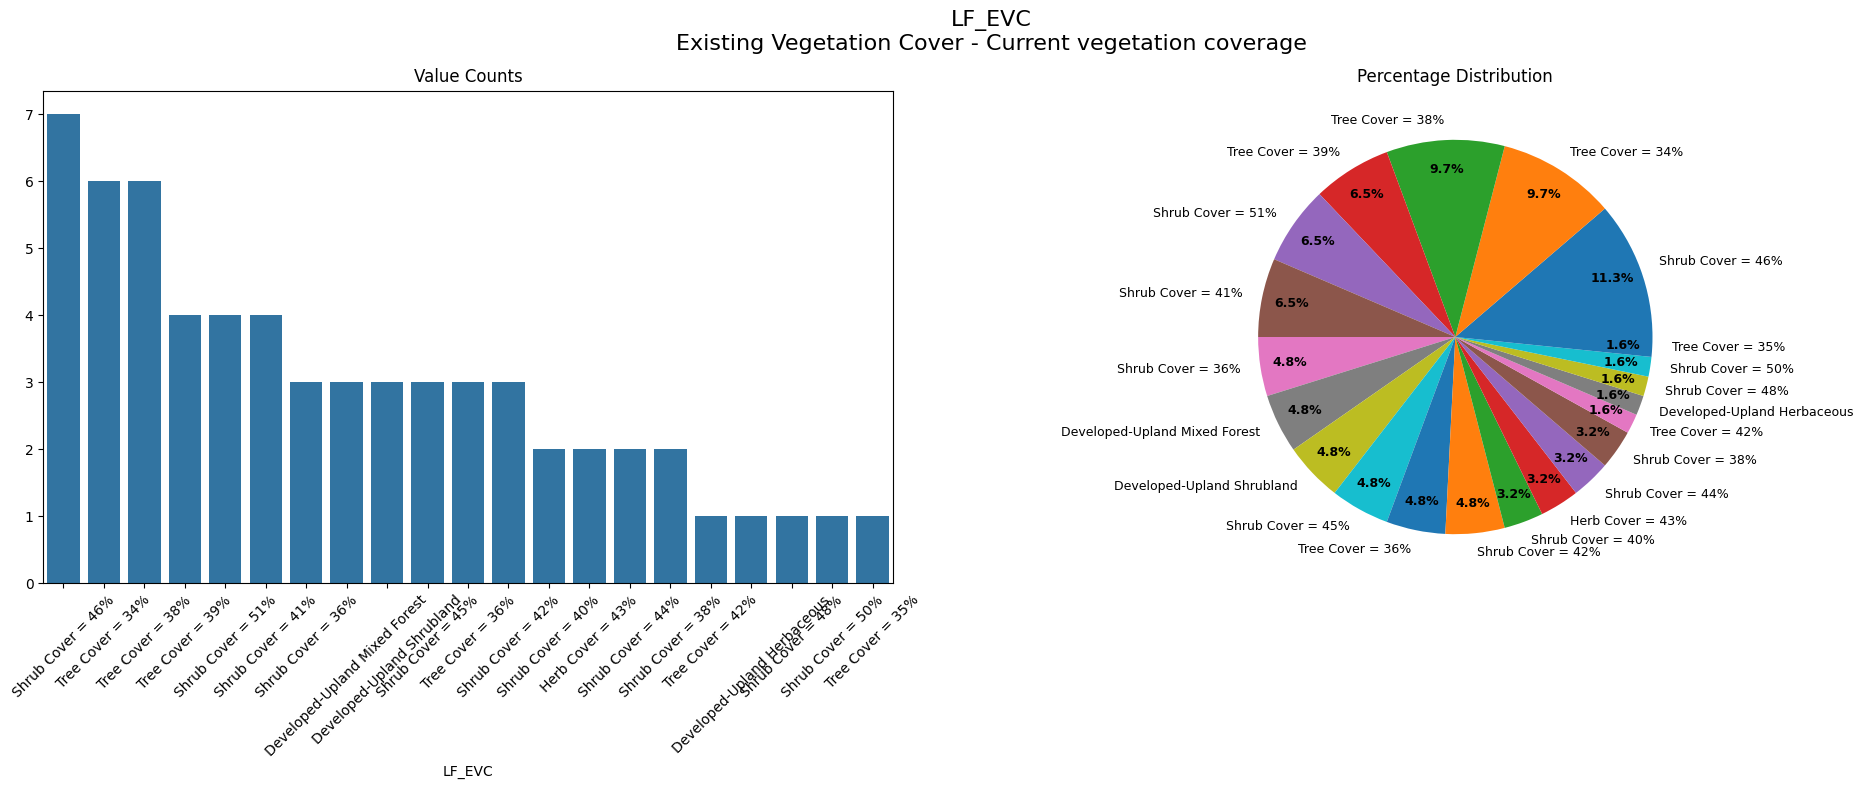


Analysis of LF_EVT
Description: Existing Vegetation Type - Current vegetation classification
Count: 62
Missing: 0
Unique Values: 10
Mode: Northern and Central California Dry-Mesic Chaparral
Mode Frequency: 27
Mode Percentage: 43.5484



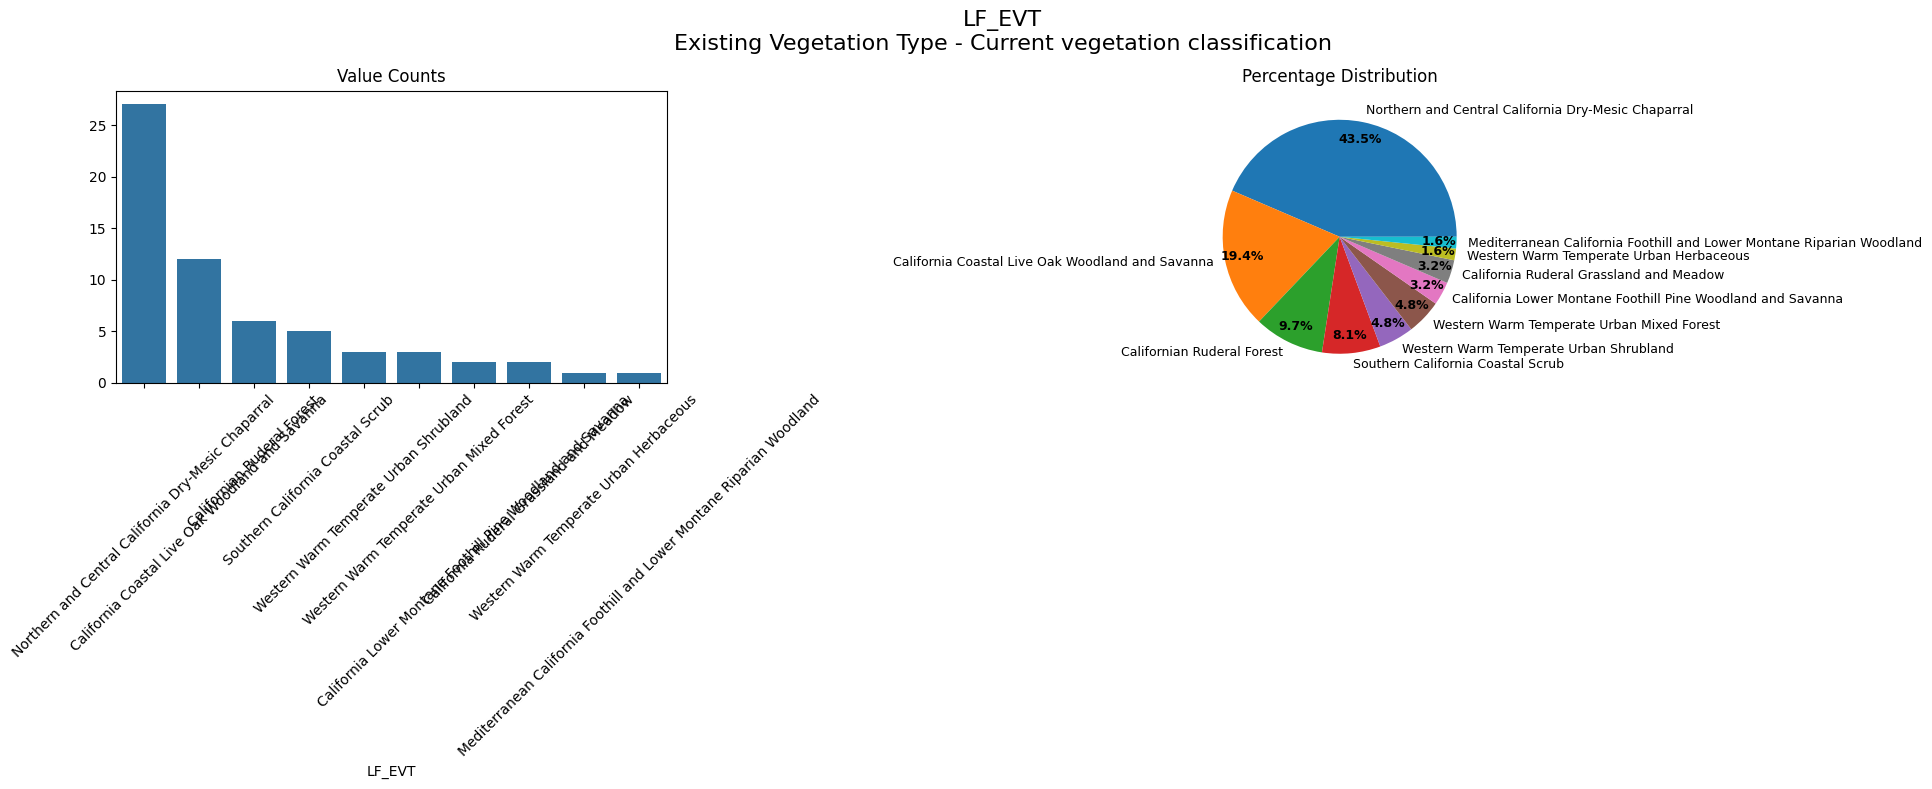


Analysis of MeanSA
Description: Mean Shrub Area (m²) - Average area of shrubs
Count: 62
Missing: 0
Mean: 5.9661
Median: 6.0500
Std Dev: 0.8331
Skewness: -0.2809
Kurtosis: -0.0484
IQR: 1.3500
Range: 4.0000



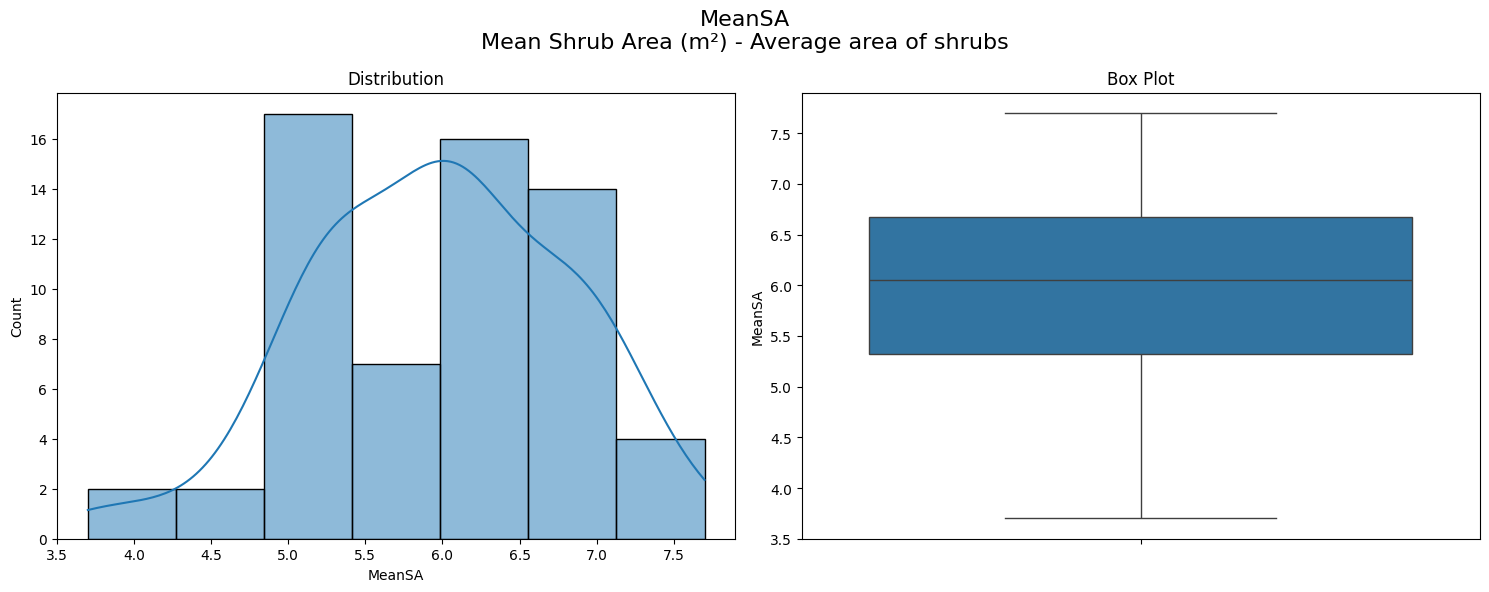


Analysis of MeanSD
Description: Mean Stem Density (stems/ha) - Average density of trees
Count: 62
Missing: 0
Mean: 8.7726
Median: 9.4000
Std Dev: 2.1886
Skewness: -0.6655
Kurtosis: -0.1864
IQR: 2.7000
Range: 9.3000



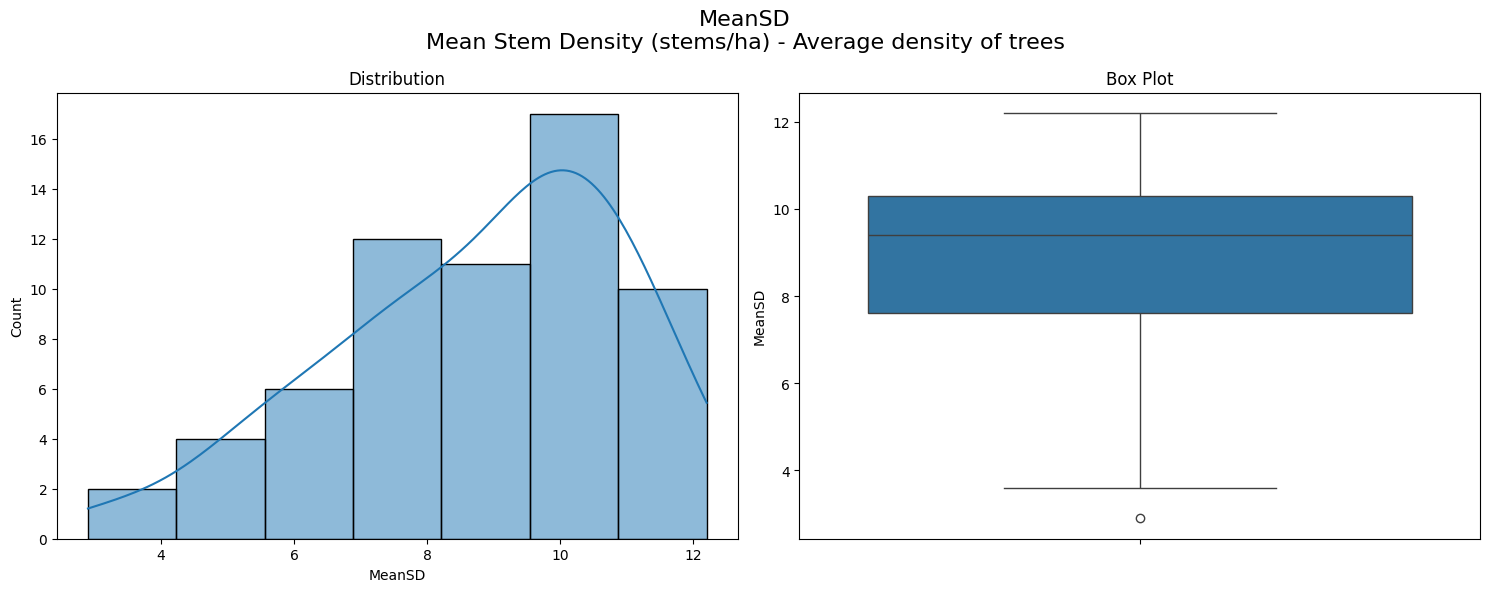


Analysis of MeanSH
Description: Mean Shrub Height (m) - Average height of shrubs
Count: 62
Missing: 0
Mean: 2.9016
Median: 2.9000
Std Dev: 0.0949
Skewness: -1.2206
Kurtosis: 1.8980
IQR: 0.1000
Range: 0.4000



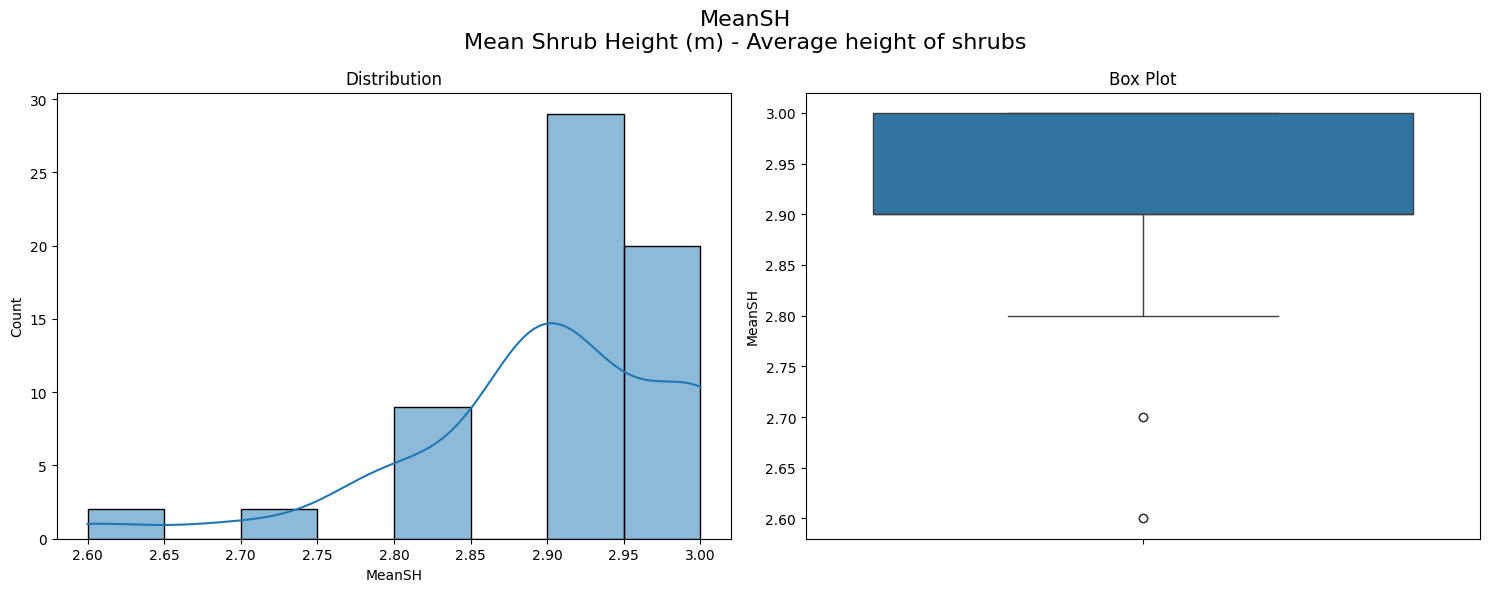


Analysis of MeanTH
Description: Mean Tree Height (m) - Average height of trees
Count: 62
Missing: 0
Mean: 8.2710
Median: 8.0000
Std Dev: 2.3301
Skewness: -0.5326
Kurtosis: 1.2303
IQR: 3.1000
Range: 12.4000



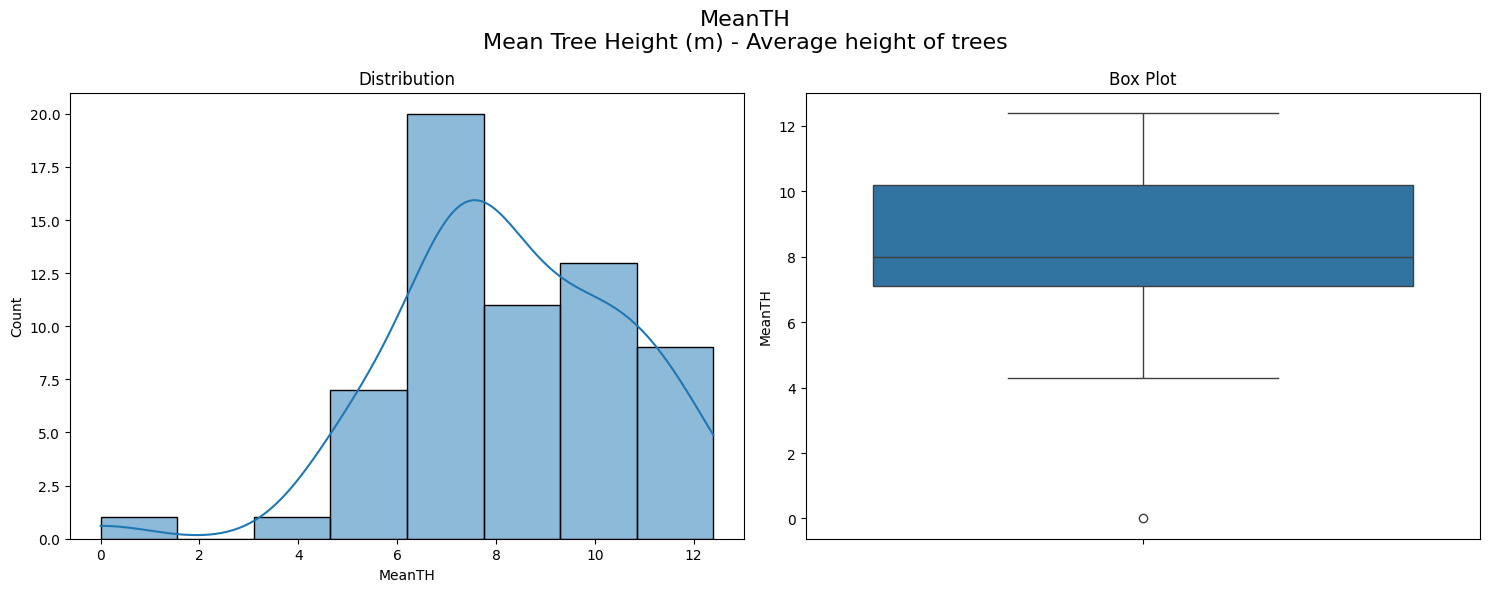


Analysis of TreesN
Description: Number of Trees - Count of trees in plot
Count: 62
Missing: 0
Mean: 5.1774
Median: 5.0000
Std Dev: 2.2509
Skewness: 0.2349
Kurtosis: -0.2639
IQR: 3.0000
Range: 10



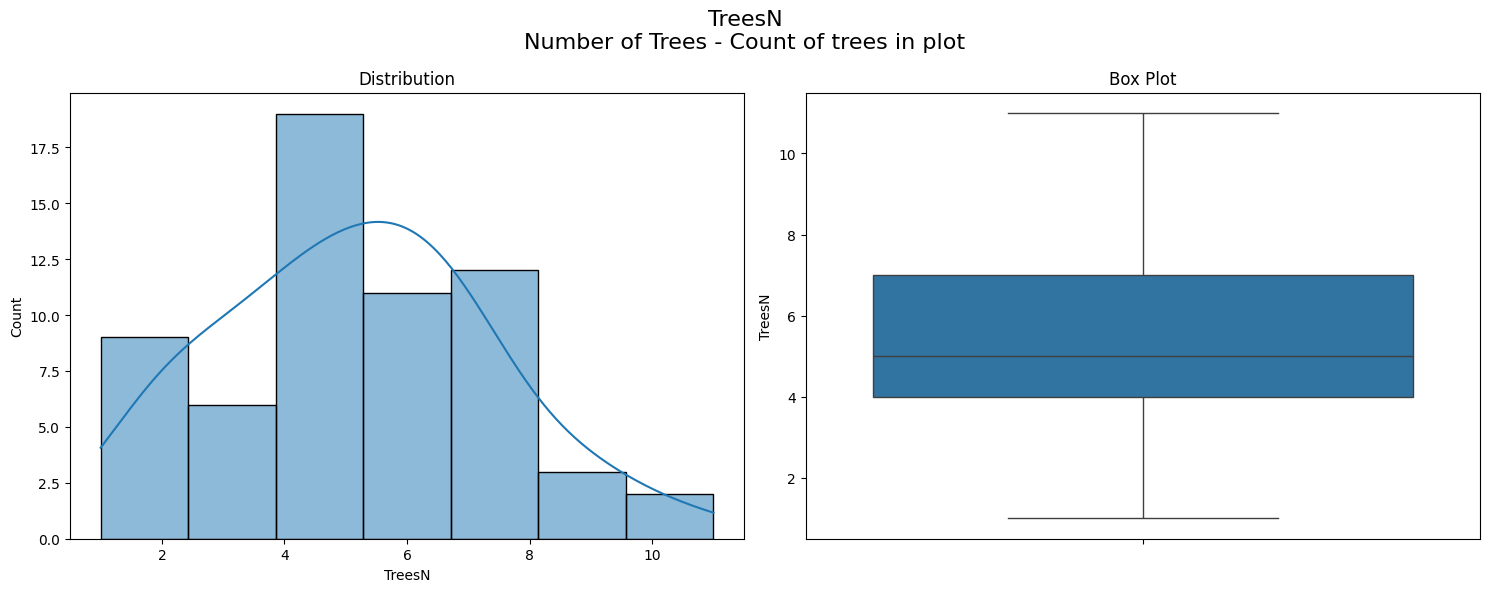


Analysis of LF_EVEL
Description: Elevation (m) - Plot elevation above sea level
Count: 62
Missing: 0
Mean: 386.0161
Median: 384.5000
Std Dev: 14.7109
Skewness: 0.3922
Kurtosis: -1.0516
IQR: 25.2500
Range: 49



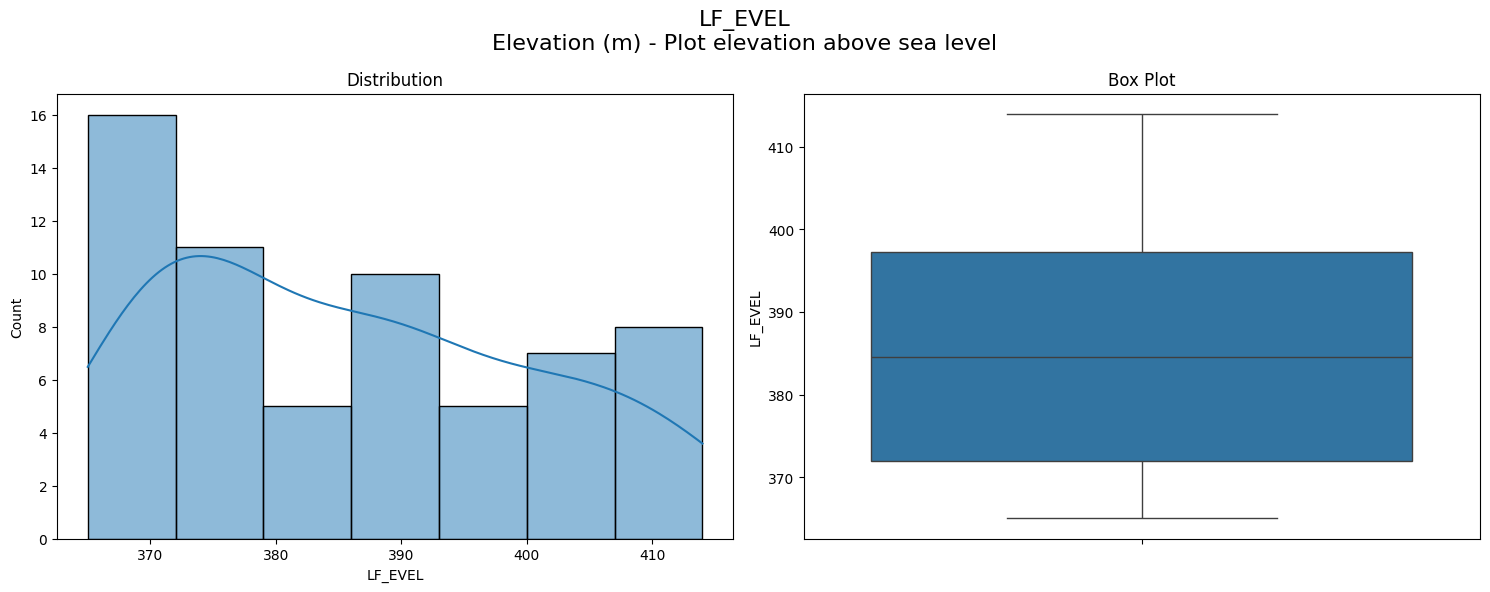


Analysis of LF_SLPD
Description: Slope Degree - Terrain steepness in degrees
Count: 62
Missing: 0
Mean: 11.5323
Median: 11.0000
Std Dev: 4.4784
Skewness: 0.2448
Kurtosis: -0.3553
IQR: 6.0000
Range: 20



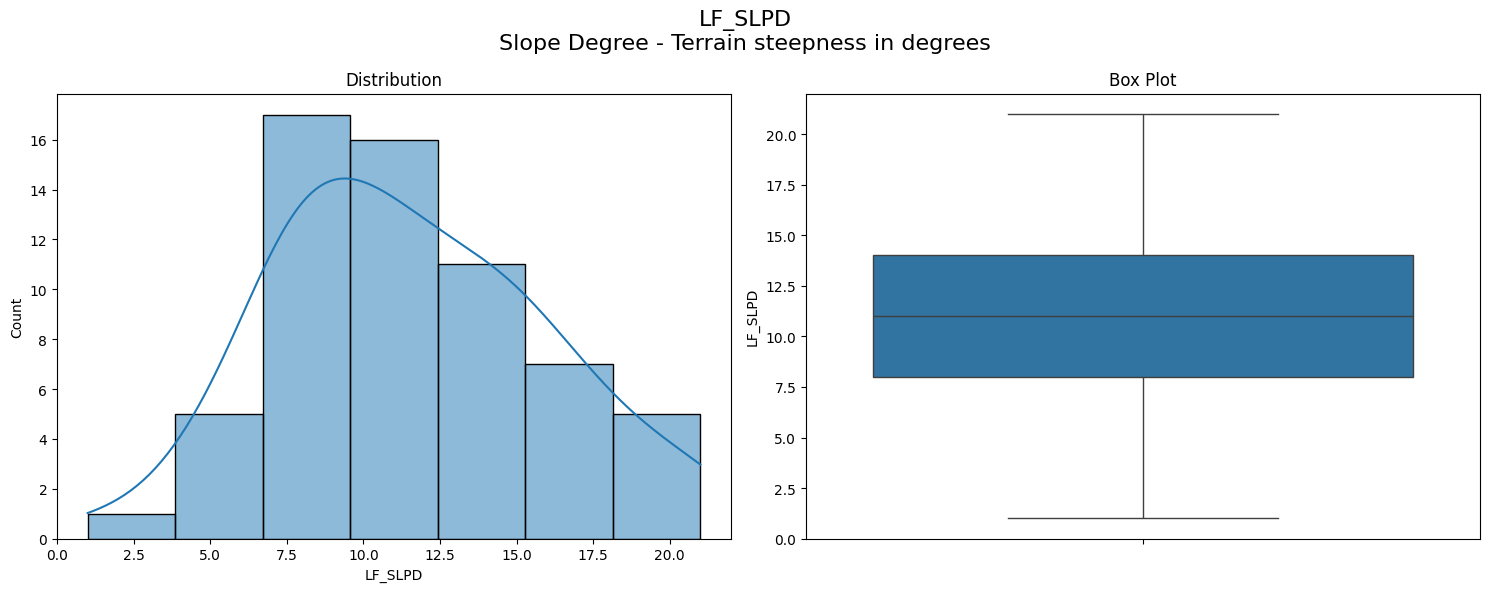


Analysis of ShrubsN
Description: Number of Shrubs - Count of shrubs in plot
Count: 62
Missing: 0
Mean: 26.4839
Median: 28.0000
Std Dev: 8.4693
Skewness: -0.2399
Kurtosis: -0.5402
IQR: 10.7500
Range: 36



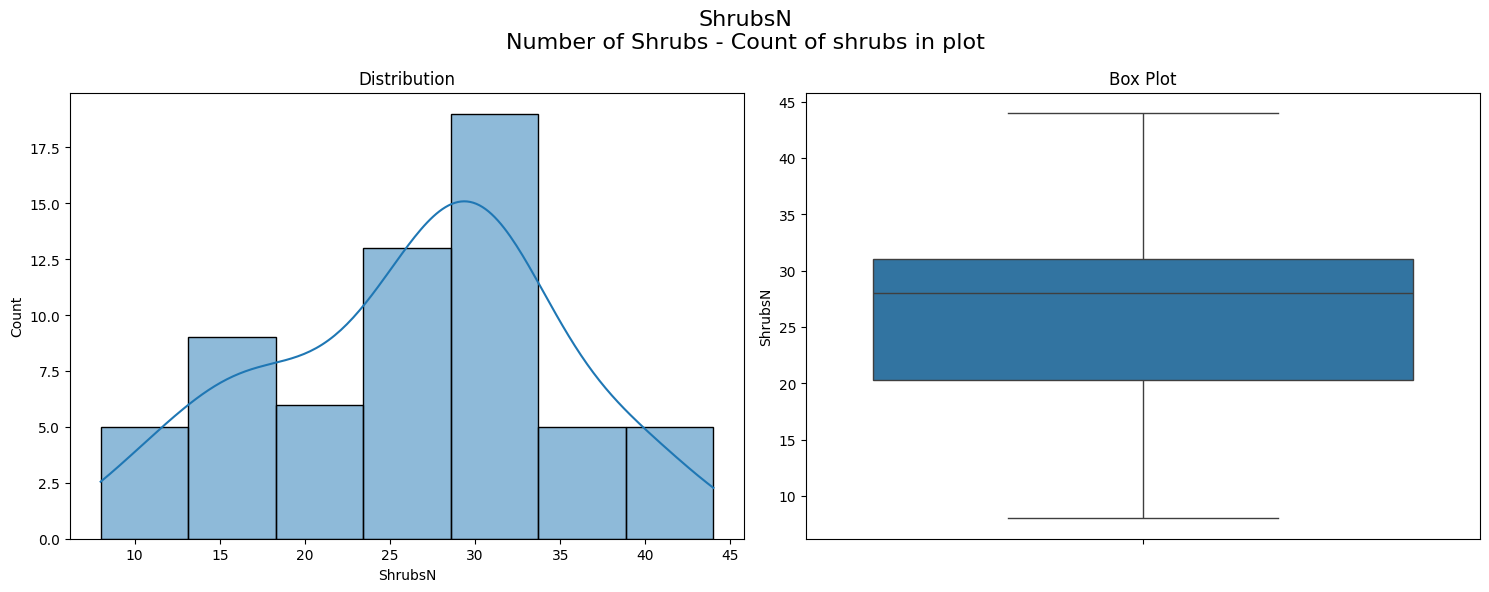


Analysis of LF_FDist
Description: Fire Disturbance - type of disturbance (e.g., "No Disturbance").
Count: 62
Missing: 0
Unique Values: 1
Mode: No Disturbance
Mode Frequency: 62
Mode Percentage: 100.0000



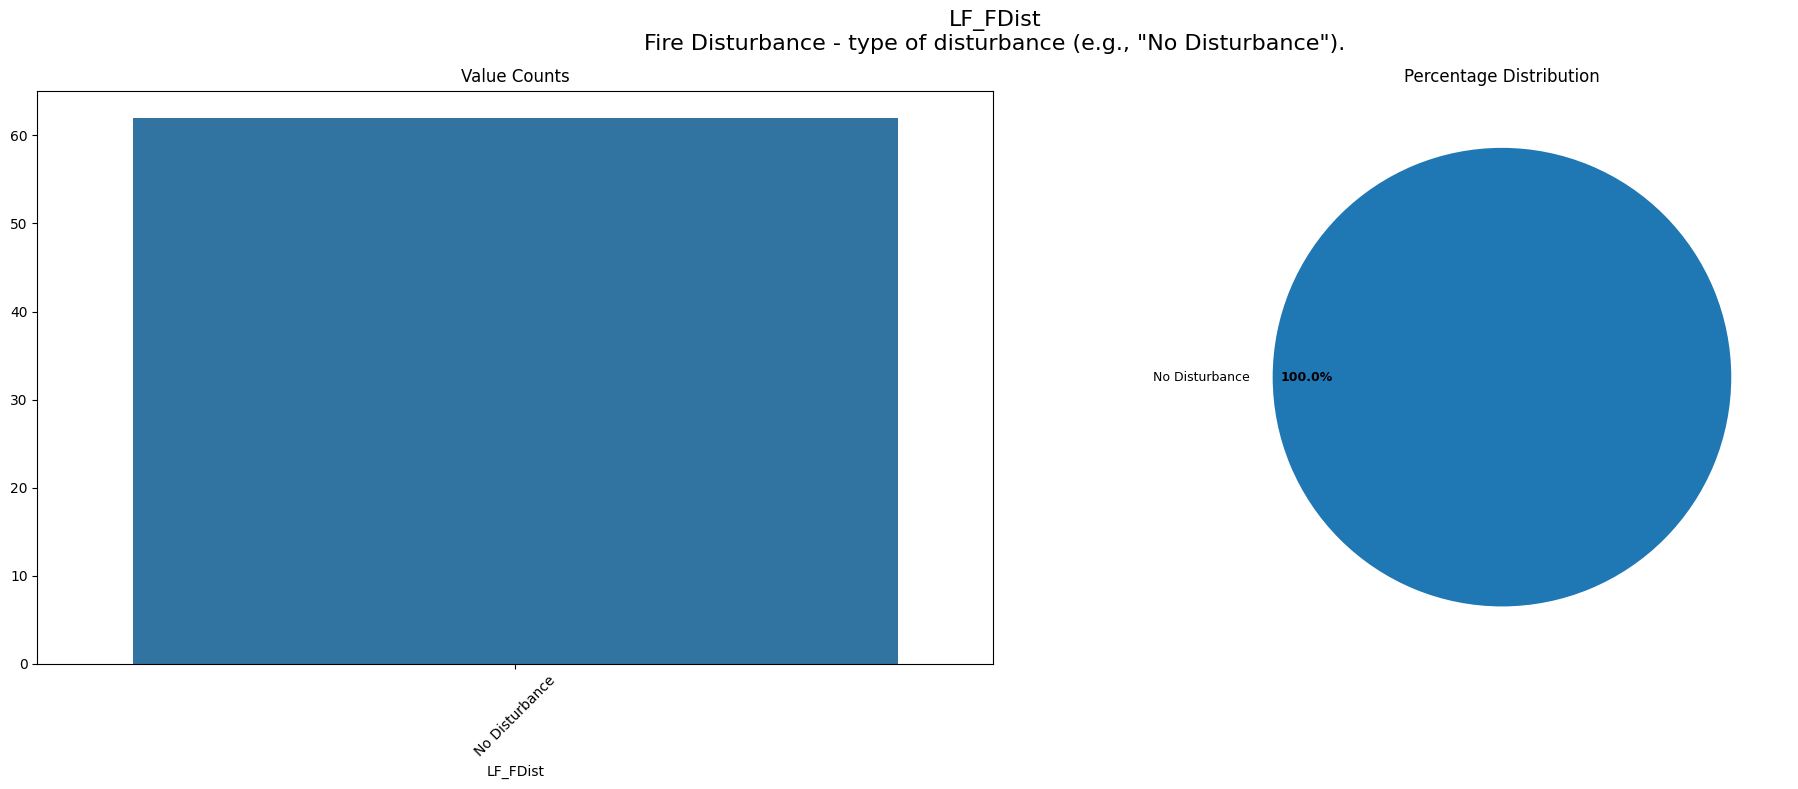


Analysis of Basalarea
Description: Total basal area per plot.
Count: 62
Missing: 0
Mean: 38.4677
Median: 32.5000
Std Dev: 27.2508
Skewness: 1.5862
Kurtosis: 3.8064
IQR: 25.0250
Range: 148.9000



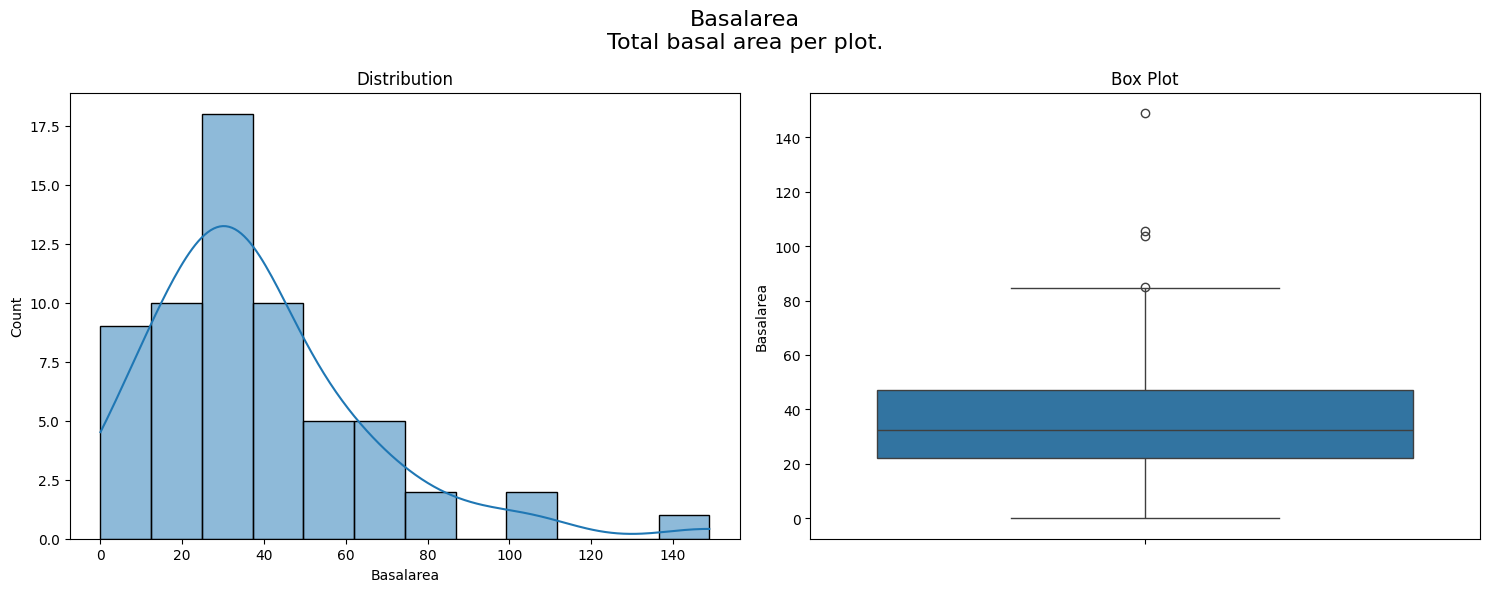


Analysis of LF_FBFM13
Description: Fire Behavior Fuel Model 13 - Standard fuel classification
Count: 62
Missing: 0
Unique Values: 5
Mode: FBFM5
Mode Frequency: 27
Mode Percentage: 43.5484



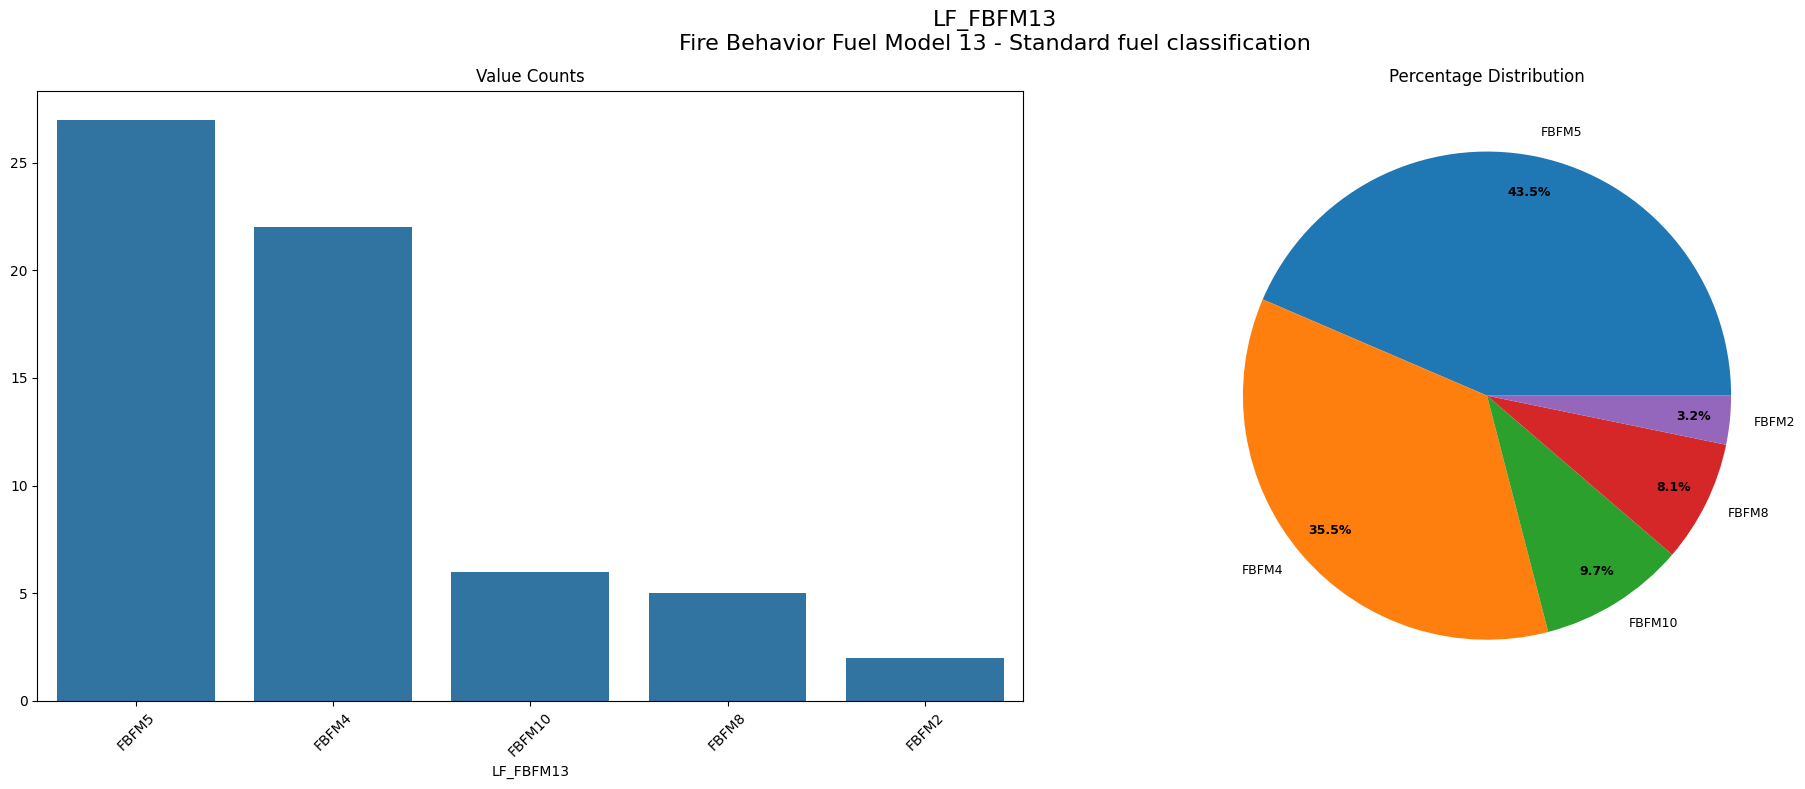


Analysis of LF_FBFM40
Description: Fire Behavior Fuel Model 40 - Detailed fuel classification
Count: 62
Missing: 0
Unique Values: 9
Mode: SH5
Mode Frequency: 22
Mode Percentage: 35.4839



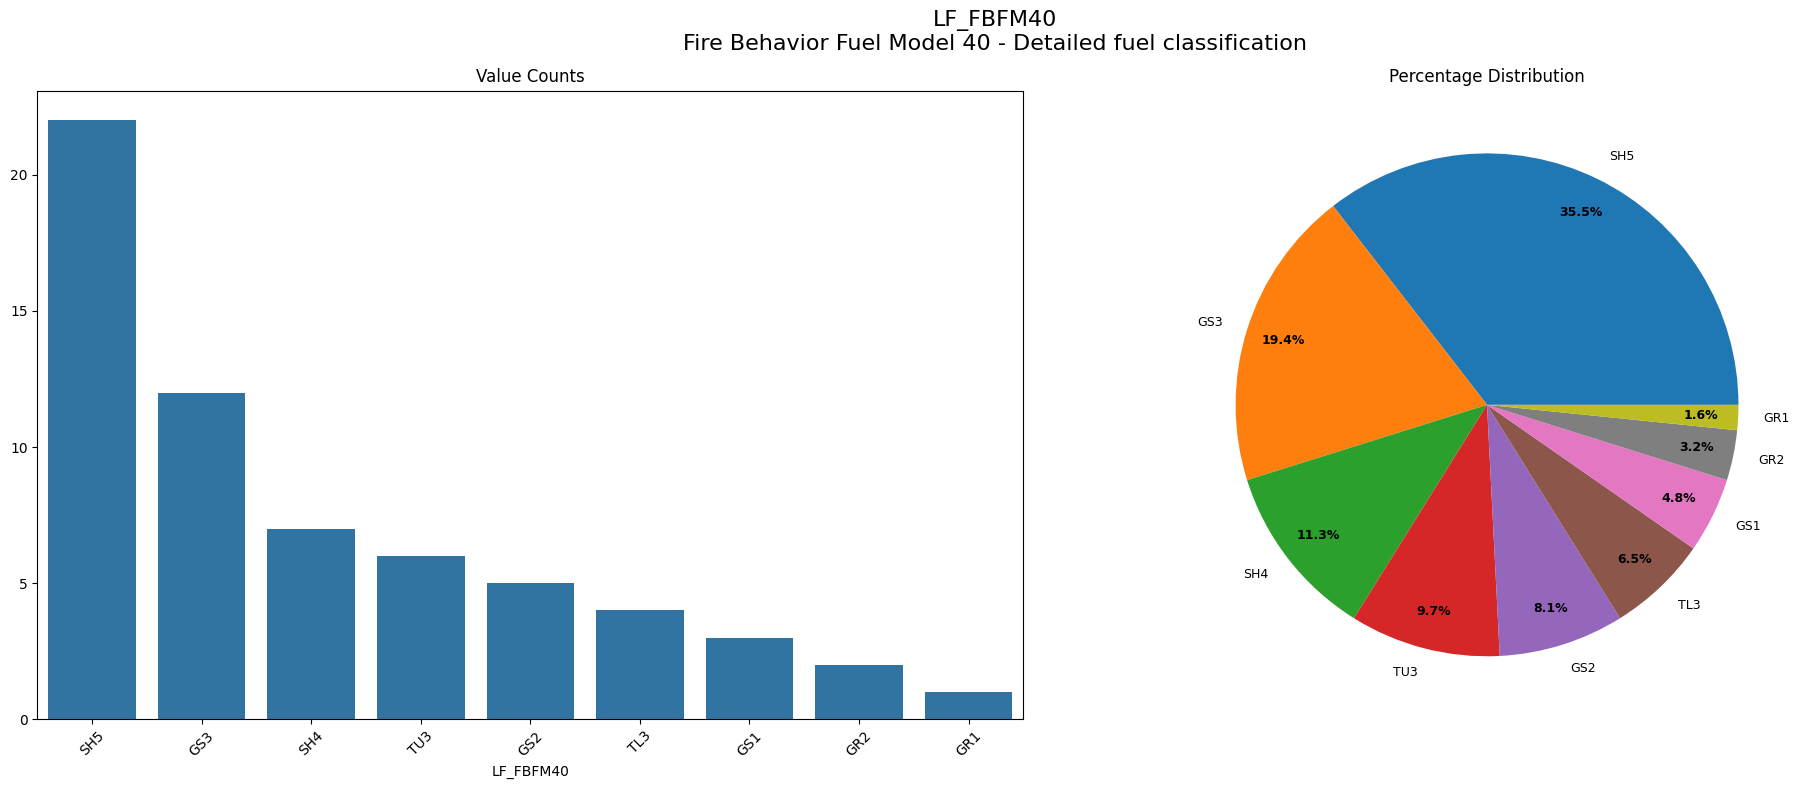


Analysis of shrubArea
Description: Shrub Area (m²) - Total area covered by shrubs
Count: 62
Missing: 0
Mean: 158.3758
Median: 165.9000
Std Dev: 54.3202
Skewness: -0.1768
Kurtosis: -0.4952
IQR: 80.0500
Range: 237.8000



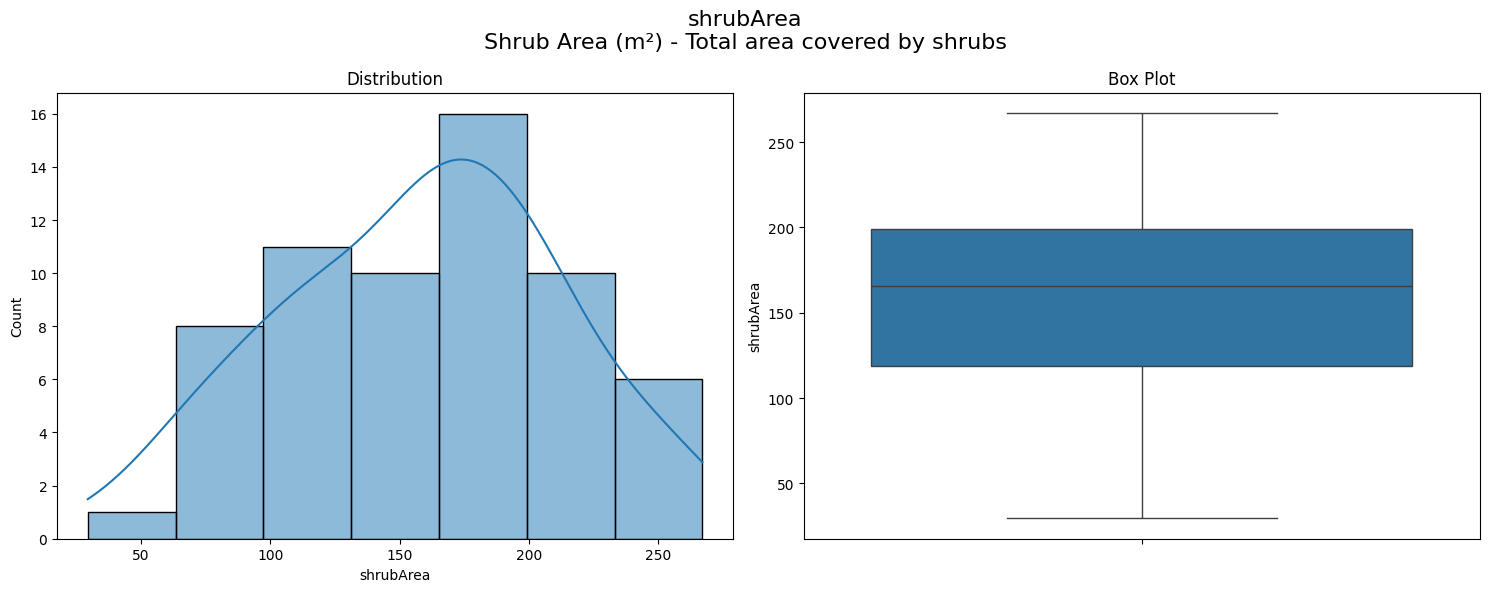


Analysis of scaledShrubArea
Description: Scaled Shrub Area - Normalized shrub coverage
Count: 62
Missing: 0
Mean: 1090.0210
Median: 1156.5000
Std Dev: 335.0862
Skewness: -0.4344
Kurtosis: -0.3311
IQR: 487.5000
Range: 1564.6000



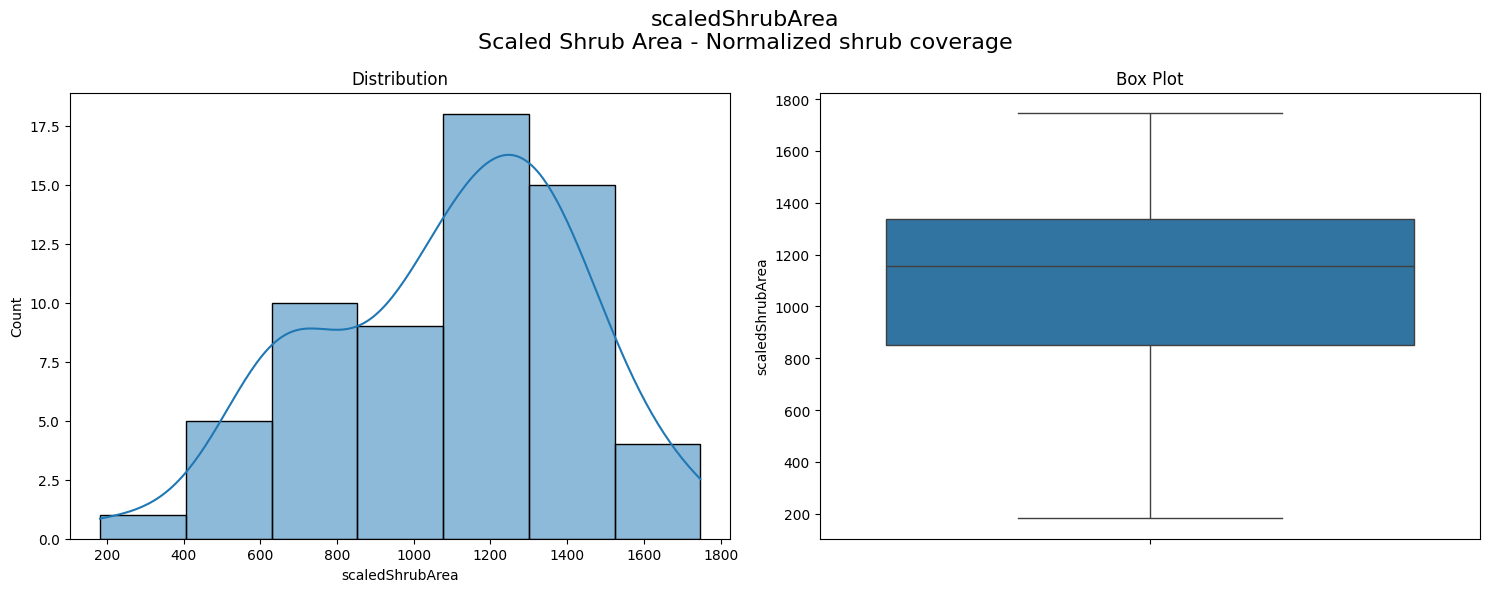


Analysis of latitude
Description: Latitude - Plot latitude
Count: 62
Missing: 0
Mean: 34.6914
Median: 34.6905
Std Dev: 0.0017
Skewness: 0.5500
Kurtosis: -1.3141
IQR: 0.0033
Range: 0.0053



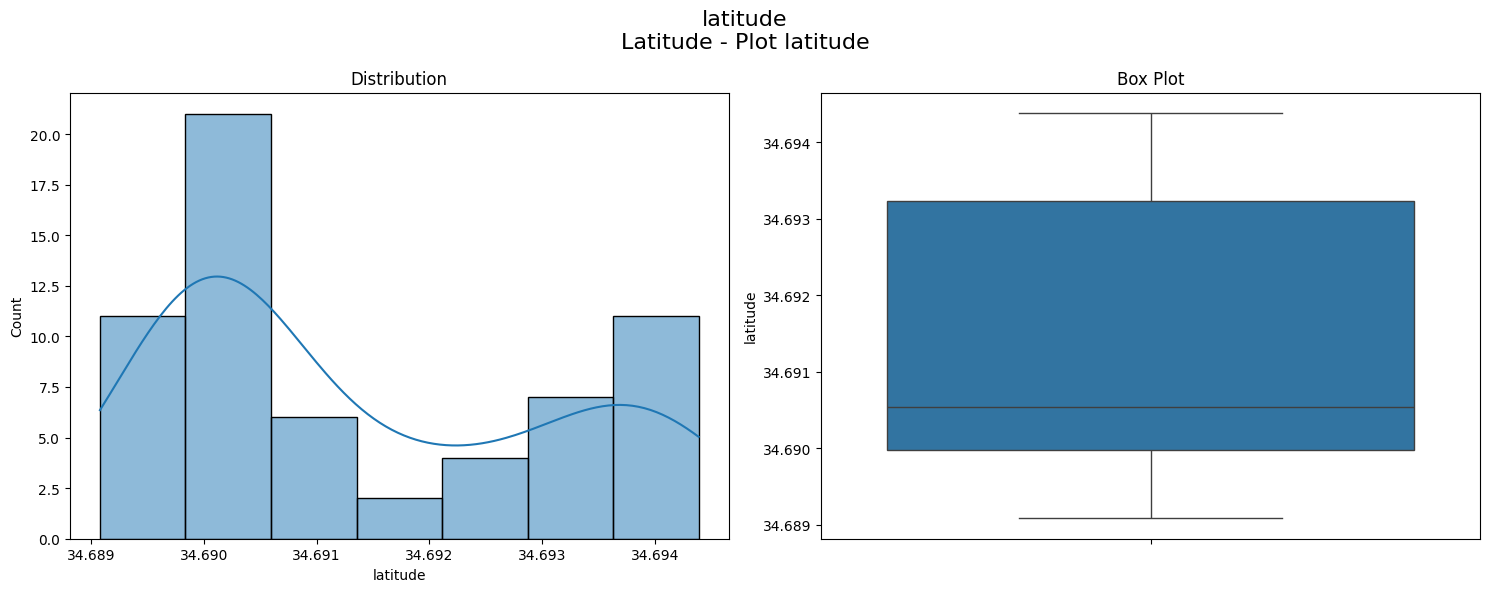


Analysis of longitude
Description: Longitude - Plot longitude
Count: 62
Missing: 0
Mean: -120.0532
Median: -120.0531
Std Dev: 0.0007
Skewness: -0.2531
Kurtosis: -0.7377
IQR: 0.0011
Range: 0.0030



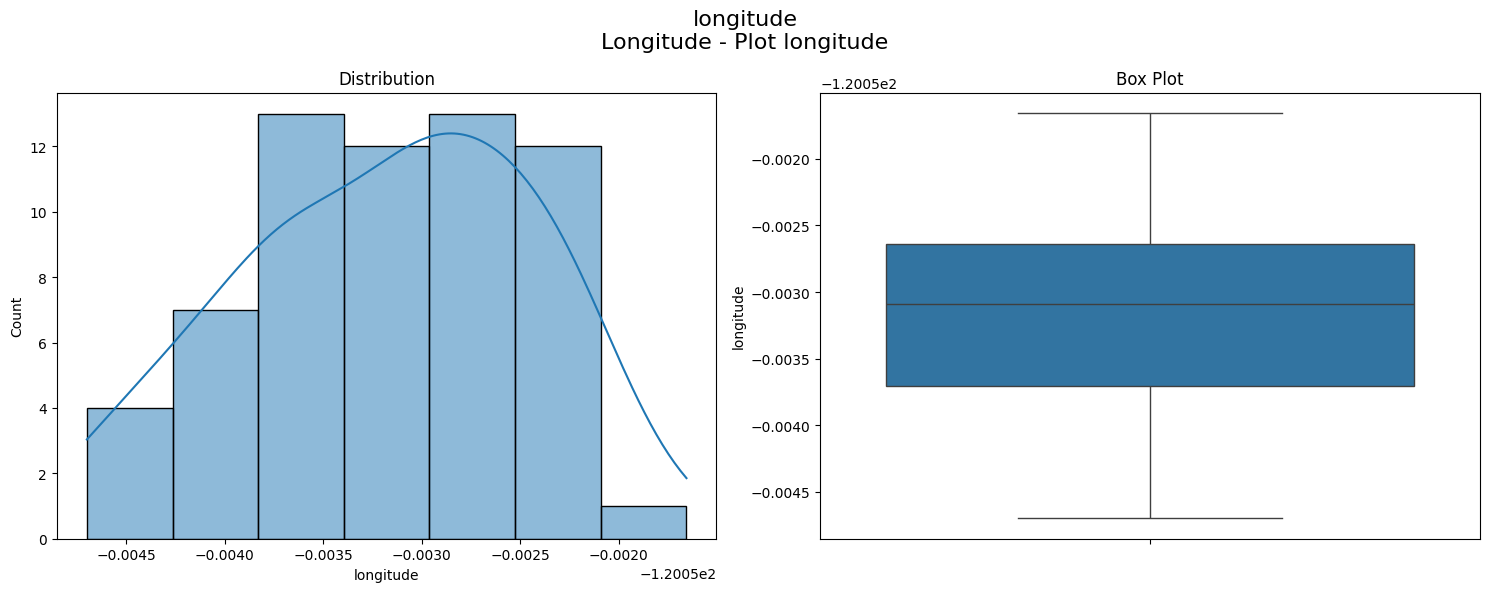

In [36]:
# Get all columns except PLOT_NAME and latlon
columns_to_analyze = [col for col in df.columns if col not in ['PLOT_NAME']]

# Analyze each column
for column in columns_to_analyze:
    analyze_column(df, column)